In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
def eval_experiment(data_path):

    data = pd.read_csv(data_path)

    var_interest = ['mlp_size', 'test_auc', 'test_acc', 'val_auc', 'val_acc']
    data = data[var_interest]

    def ensure_numeric(df, var_interest):
        """
        For each column in var_interest, check dtype and convert to numeric if not already.
        Non-convertible values become NaN.
        """
        for col in var_interest:
            if not pd.api.types.is_numeric_dtype(df[col]):
                df[col] = pd.to_numeric(df[col], errors='coerce')
        return df

    data = ensure_numeric(data, var_interest)       
    
    data_summary_mean = data.groupby('mlp_size').mean().reset_index()
    data_summary_var = data.groupby('mlp_size').var().reset_index()
    data_summary = pd.merge(data_summary_mean, data_summary_var, on='mlp_size', suffixes=('_mean', '_var'))

    # Datos
    x = data_summary['mlp_size']

    # Primer subplot: AUC
    y = data_summary['test_auc_mean']
    z = data_summary['val_auc_mean']
    std_y = np.sqrt(data_summary['test_auc_var'])
    std_z = np.sqrt(data_summary['val_auc_var'])

    # Segundo subplot: Accuracy
    a = data_summary['test_acc_mean']
    b = data_summary['val_acc_mean']
    std_a = np.sqrt(data_summary['test_acc_var'])
    std_b = np.sqrt(data_summary['val_acc_var'])

    # Crear figura con 2 subplots lado a lado
    fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharex=True)

    # Subplot 1: AUC
    axes[0].plot(x, y, label='Test AUC Mean', color='blue')
    axes[0].plot(x, z, label='Val AUC Mean', color='orange')
    axes[0].fill_between(x, y - std_y, y + std_y, color='blue', alpha=0.2)
    axes[0].fill_between(x, z - std_z, z + std_z, color='orange', alpha=0.2)
    axes[0].set_xlabel('MLP Size')
    axes[0].set_ylabel('AUC')
    axes[0].legend()
    axes[0].set_title('AUC vs MLP Size')

    # Subplot 2: Accuracy
    axes[1].plot(x, a, label='Test Acc Mean', color='green')
    axes[1].plot(x, b, label='Val Acc Mean', color='red')
    axes[1].fill_between(x, a - std_a, a + std_a, color='green', alpha=0.2)
    axes[1].fill_between(x, b - std_b, b + std_b, color='red', alpha=0.2)
    axes[1].set_xlabel('MLP Size')
    axes[1].set_ylabel('Accuracy')
    axes[1].legend()
    axes[1].set_title('Accuracy vs MLP Size')

    plt.tight_layout()
    plt.show()



Processing: Entangling_No_Entangling/Exp_qbits_range_2_10_no_entangling/results_grid_search.csv


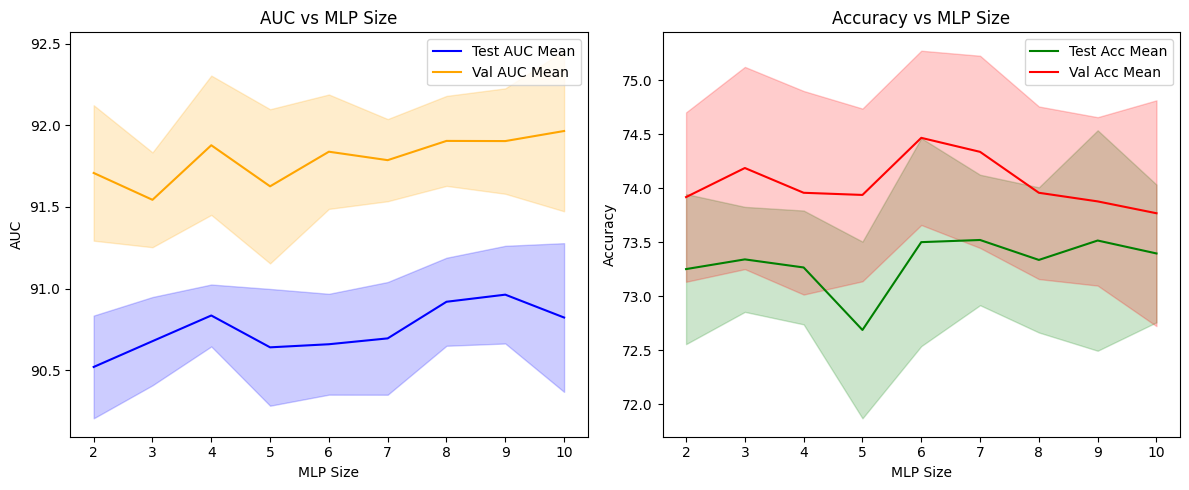

Processing: Entangling_No_Entangling/Exp_qbits_range_2_10_strong_entangling/results_grid_search.csv


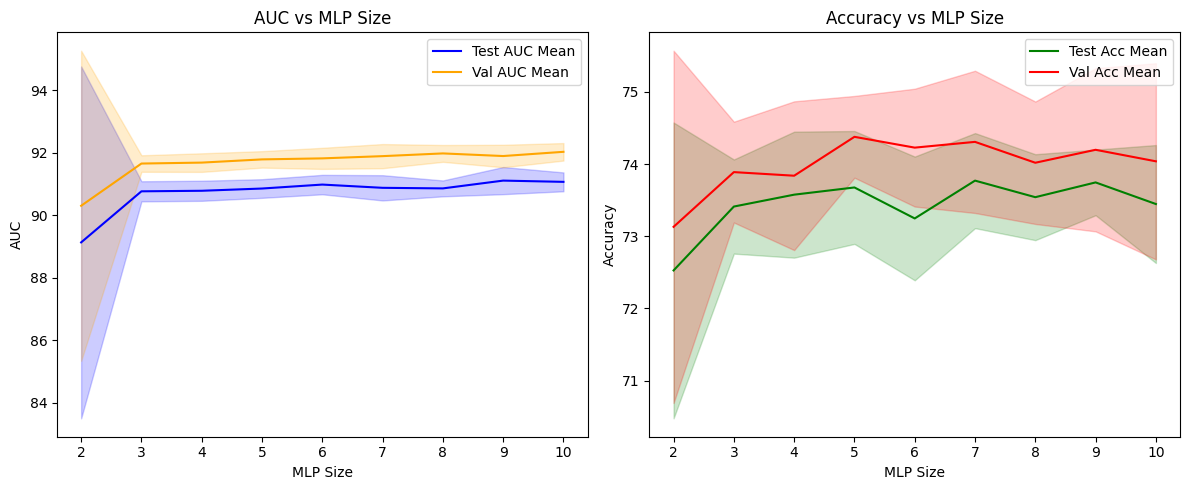

Processing: Entangling_No_Entangling/Exp_qbits_range_2_10/results_grid_search.csv


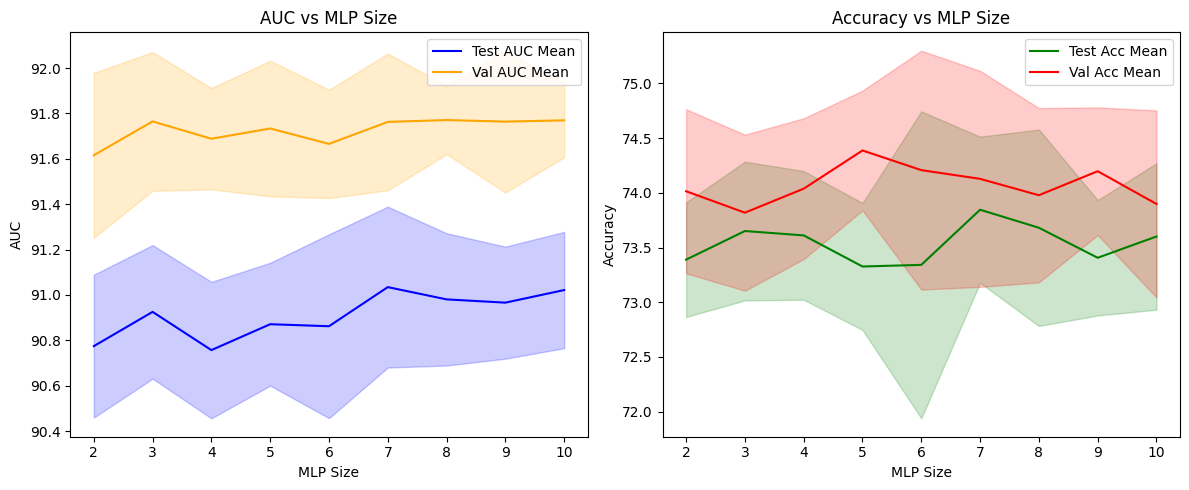

In [13]:
import os

base_path = 'Entangling_No_Entangling/'

for entry in os.listdir(base_path):
    csv_path = os.path.join(base_path, entry, 'results_grid_search.csv')
    
    if os.path.isfile(csv_path):

        print(f"Processing: {csv_path}")
        eval_experiment(csv_path)
        
    else:
        print(f"File not found: {csv_path}")


# Attention Selection or Not

In [14]:
def eval_experiment_attention_all(data_path):

    def eval_experiment_attention(data_path, label):
        # Load data
        data = pd.read_csv(data_path)

        # Select variables of interest
        metrics = ['test_auc', 'test_acc', 'val_auc', 'val_acc']
        group_vars = ['num_transf', 'mlp_size']
        selected_vars = group_vars + metrics
        data = data[selected_vars]

        # Ensure all metric columns are numeric
        data[metrics] = data[metrics].apply(pd.to_numeric, errors='coerce')

        # Compute mean and variance grouped by 'num_transf' and 'mlp_size'
        grouped = data.groupby(group_vars)
        max_auc = data['test_auc'].max()
        max_auc_row = data[data['test_auc'] == max_auc].iloc[0]
        max_acc = data['test_acc'].max()
        max_acc_row = data[data['test_acc'] == max_acc].iloc[0]
        print(f"Max Test AUC: {max_auc_row['test_auc']} at num_transf={max_auc_row['num_transf']}, mlp_size={max_auc_row['mlp_size']}")
        print(f"Max Test Acc: {max_acc_row['test_acc']} at num_transf={max_acc_row['num_transf']}, mlp_size={max_acc_row['mlp_size']}")
        mean_df = grouped.mean().reset_index()
        var_df = grouped.var().reset_index()

        # Merge mean and variance summaries
        # Merge mean and variance summaries
        summary_df = pd.merge(mean_df, var_df, on=group_vars, suffixes=('_mean', '_var'))
   

        # Print a specific metric for inspection
        # print(summary_df[['num_transf', 'mlp_size', 'test_auc_mean', 'test_auc_var']])
        # Plotting

        # Pivot the DataFrame to shape (num_transf x mlp_size) with test_auc_mean as values
        # heatmap_data = summary_df.pivot(index='num_transf', columns='mlp_size', values='test_auc_mean')

        # # Create heatmap
        # plt.figure(figsize=(10, 6))
        # sns.heatmap(heatmap_data, annot=True, fmt=".3f", cmap="viridis", cbar_kws={'label': 'Test AUC (mean)'})

        # plt.title("Test AUC Mean by num_transf and mlp_size")
        # plt.xlabel("MLP Size")
        # plt.ylabel("Number of Transformers")
        # plt.tight_layout()
        # plt.show()

        return [data, summary_df.assign(experiment=label)]  # Add a column for identification
    
    summaries = []

    entries = os.listdir(data_path)

    for entry in entries:
        csv_path = os.path.join(data_path, entry, 'results_grid_search.csv')
        if os.path.isfile(csv_path):
            print(f"Processing: {csv_path}")
            summary = eval_experiment_attention(csv_path, label=entry)
            summaries.append(summary)
        else:
            print(f"File not found: {csv_path}")

    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    labels = ['No Attention Selection', 'Attention Selection']

    for i, summary in enumerate(summaries):
        label = entries[i]
        pivot = summary[1].pivot(index='num_transf', columns='mlp_size', values='test_auc_mean')
        sns.heatmap(pivot, annot=True, fmt=".3f", cmap="viridis", ax=axes[i], cbar=i == 1)
        axes[i].set_title(f"Test AUC Mean: {label}")
        axes[i].set_xlabel("MLP Size")
        axes[i].set_ylabel("Num Transf")

    plt.tight_layout()
    plt.show()

    # Ensure both summaries are aligned
    df1, df2 = summaries
    pivot1 = df1[1].pivot(index='num_transf', columns='mlp_size', values='test_auc_mean')
    pivot2 = df2[1].pivot(index='num_transf', columns='mlp_size', values='test_auc_mean')

    # Compute difference (e.g., experiment2 - experiment1)
    diff = pivot2 - pivot1

    plt.figure(figsize=(10, 6))
    sns.heatmap(diff, annot=True, fmt=".3f", center=0, cmap="coolwarm", cbar_kws={'label': 'Δ Test AUC'})
    plt.title("Difference in Test AUC Mean (No Attention - Attention)")
    plt.xlabel("MLP Size")
    plt.ylabel("Num Transf")
    plt.tight_layout()
    plt.show()

    return summaries


# Attention or Not: Strong Entanglement

Processing: Attention_Selection_Or_Not/StrongEntanglement/Exp_qbits_3_to_6_ntransformer_1_to_2/results_grid_search.csv
Max Test AUC: 92.3990389268086 at num_transf=2.0, mlp_size=6.0
Max Test Acc: 76.40897755610972 at num_transf=2.0, mlp_size=6.0
Processing: Attention_Selection_Or_Not/StrongEntanglement/Exp_qbits_3_to_6_ntransformer_1_to_2_attn_sel/results_grid_search.csv
Max Test AUC: 91.8083695343788 at num_transf=2.0, mlp_size=3.0
Max Test Acc: 75.0623441396509 at num_transf=2.0, mlp_size=3.0


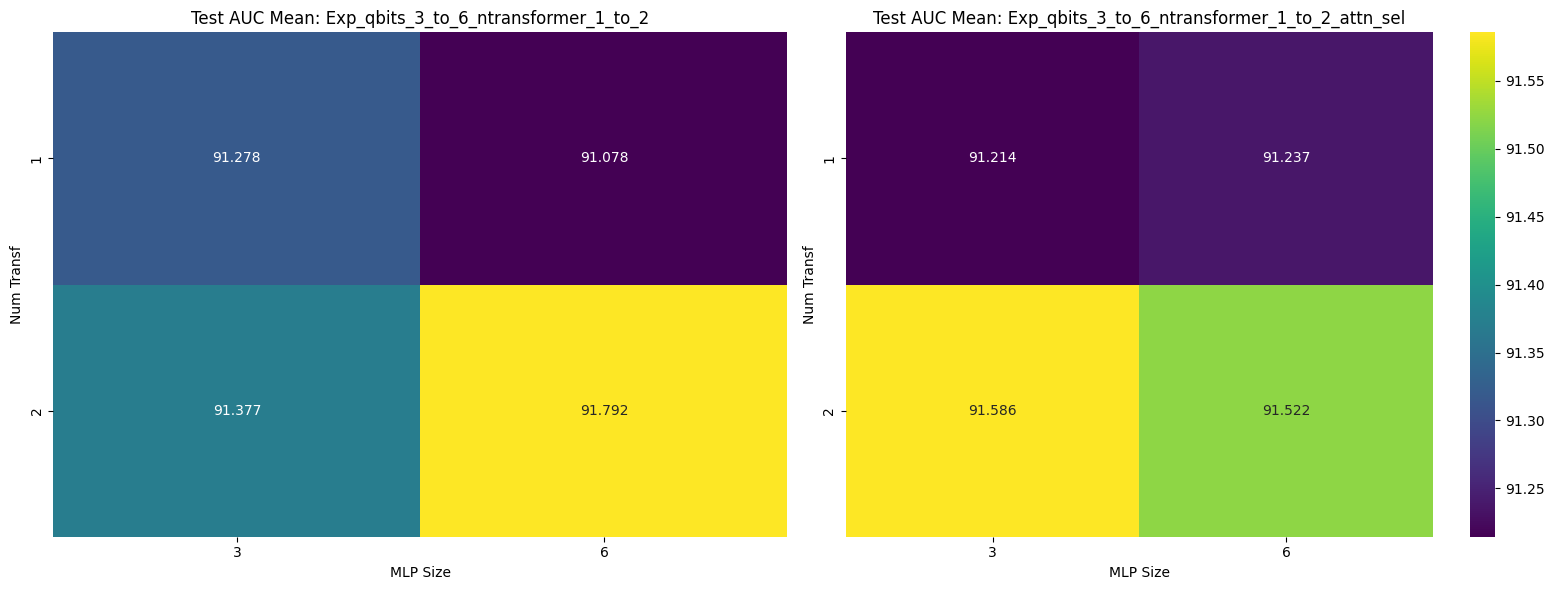

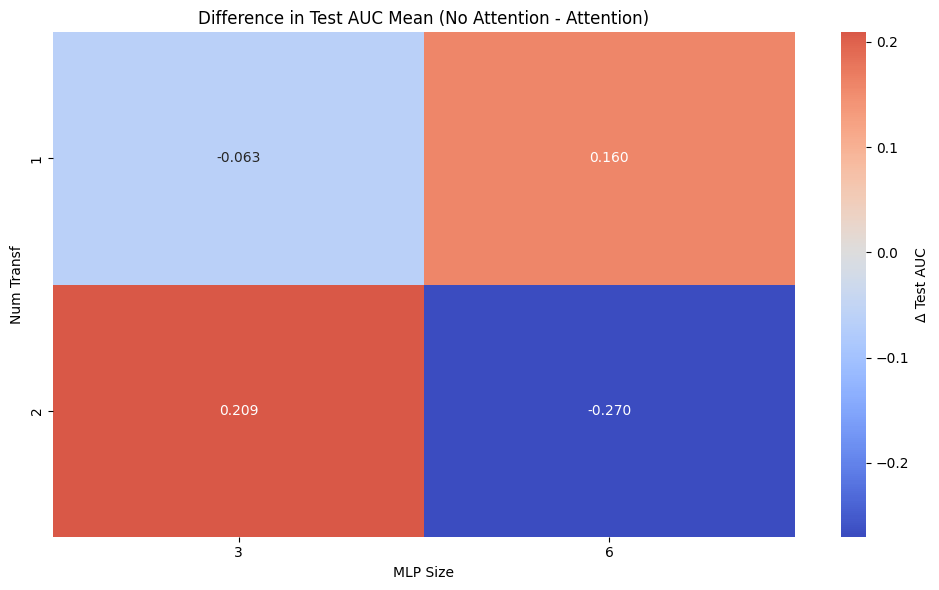

In [15]:
data_path = 'Attention_Selection_Or_Not/StrongEntanglement/'
results = eval_experiment_attention_all(data_path)

# Attention or Not: No Entanglement

Processing: Attention_Selection_Or_Not/NoEntanglement/Exp_qbits_3_to_6_ntransformer_1_to_2/results_grid_search.csv
Max Test AUC: 91.6132990621252 at num_transf=2.0, mlp_size=3.0
Max Test Acc: 74.86284289276807 at num_transf=2.0, mlp_size=3.0
Processing: Attention_Selection_Or_Not/NoEntanglement/Exp_qbits_3_to_6_ntransformer_1_to_2_attn_sel/results_grid_search.csv
Max Test AUC: 92.36801436322052 at num_transf=2.0, mlp_size=3.0
Max Test Acc: 75.86034912718205 at num_transf=2.0, mlp_size=3.0


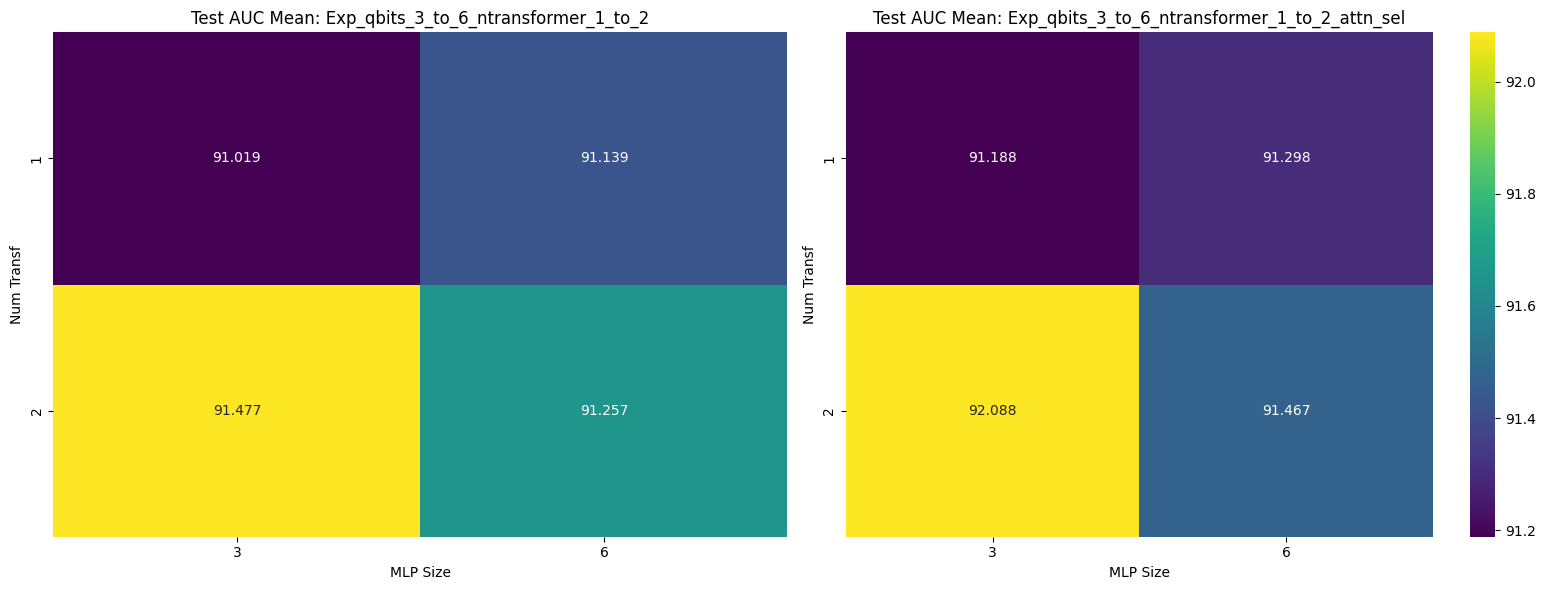

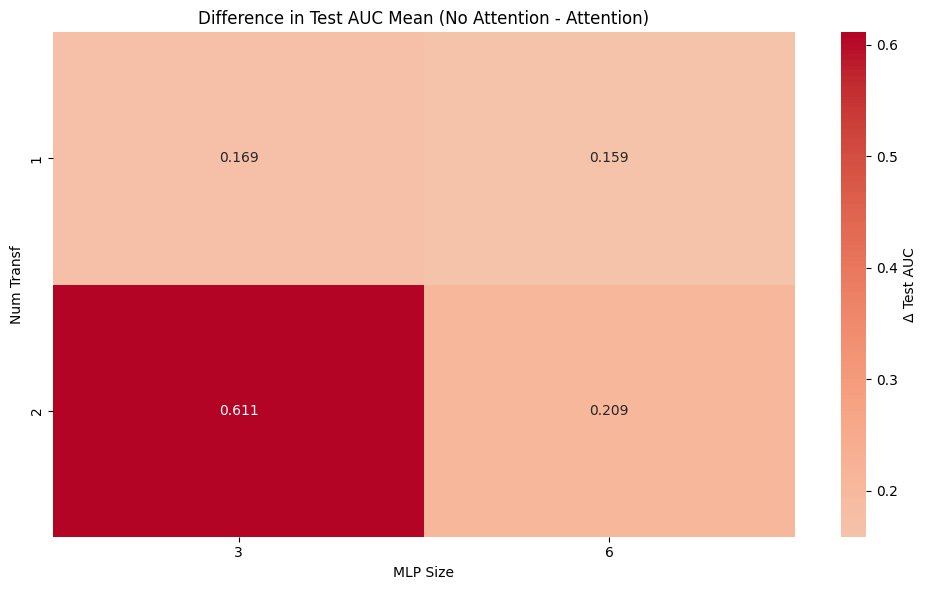

In [16]:
data_path = 'Attention_Selection_Or_Not/NoEntanglement/'
results = eval_experiment_attention_all(data_path)

# Attention or Not: No Entanglement, 10 Experiments

Processing: Attention_Selection_Or_Not/NoEntanglement_10_experiments/No_Attention_Selection/results_grid_search.csv
Max Test AUC: 92.206991351851 at num_transf=2.0, mlp_size=3.0
Max Test Acc: 75.41147132169576 at num_transf=2.0, mlp_size=3.0
Processing: Attention_Selection_Or_Not/NoEntanglement_10_experiments/Attention_Selection/results_grid_search.csv
Max Test AUC: 92.32159055550444 at num_transf=2.0, mlp_size=3.0
Max Test Acc: 75.61097256857855 at num_transf=2.0, mlp_size=3.0


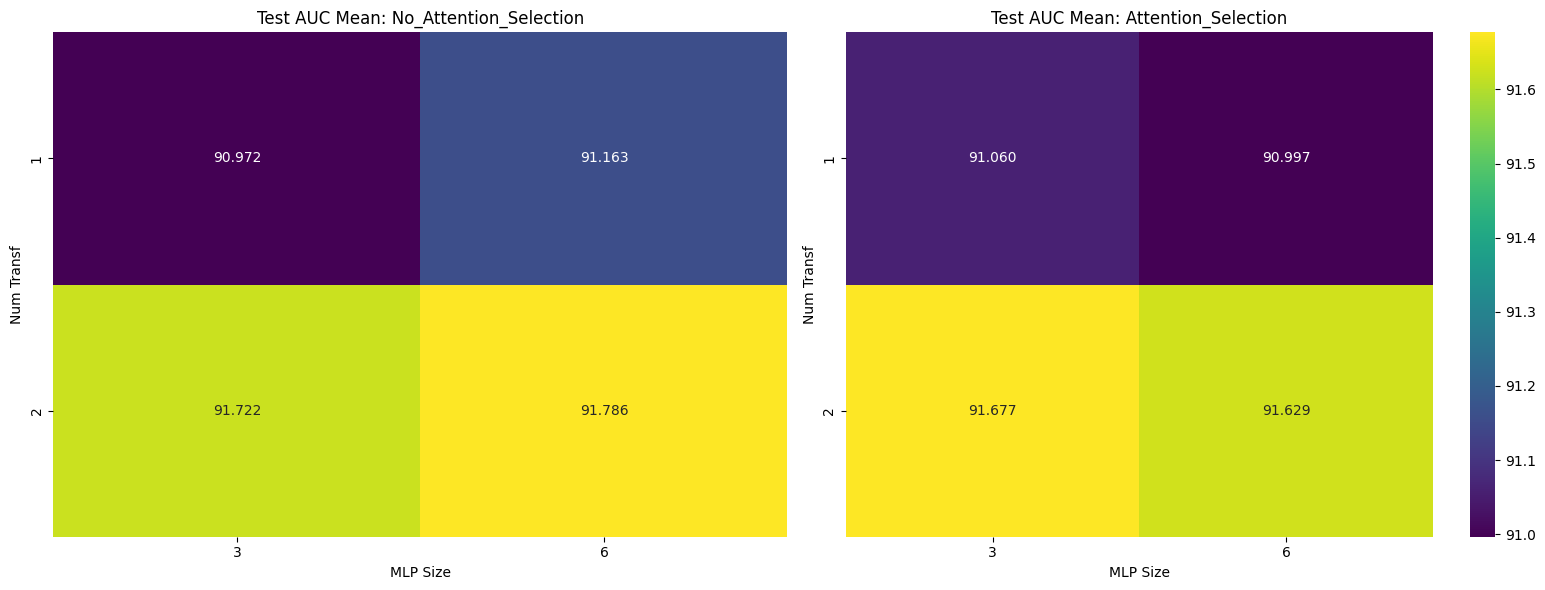

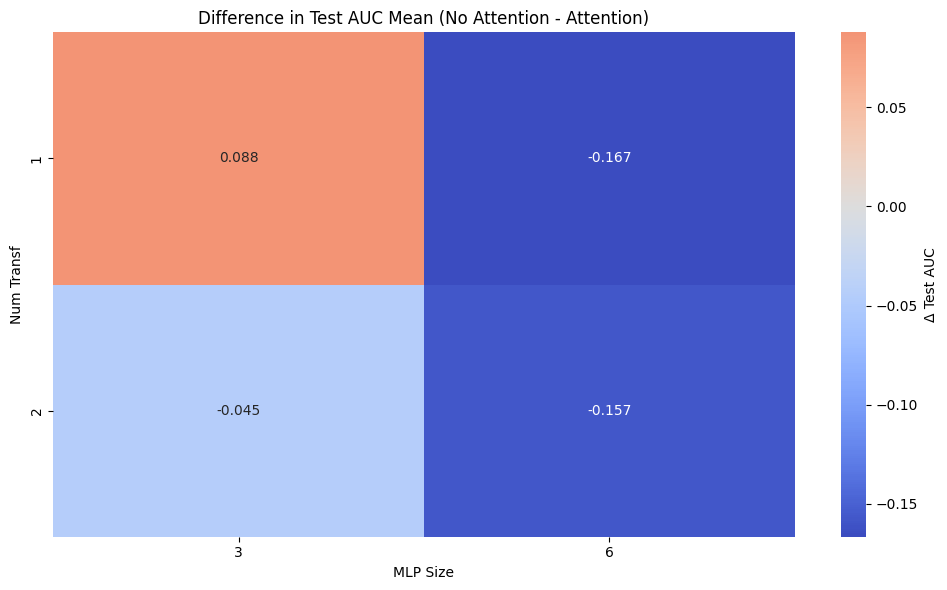

In [17]:
data_path = 'Attention_Selection_Or_Not/NoEntanglement_10_experiments/'
results = eval_experiment_attention_all(data_path)

In [18]:
def plot_2_boxplots(Attention, NoAttention, mlp_sizes, num_transfs):
    # Set up the 2x2 subplot grid
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    axes = axes.flatten()  # Flatten to easily iterate

    for idx, (mlp, transf) in enumerate([(m, t) for m in mlp_sizes for t in num_transfs]):
        # Filter DataFrames
        att = Attention[(Attention['mlp_size'] == mlp) & (Attention['num_transf'] == transf)]
        noatt = NoAttention[(NoAttention['mlp_size'] == mlp) & (NoAttention['num_transf'] == transf)]

        # Create combined DataFrame
        df_plot = pd.DataFrame({
            'test_auc': pd.concat([att['test_auc'], noatt['test_auc']], ignore_index=True),
            'Condition': ['Attention Selection'] * len(att) + ['No Attention Selection'] * len(noatt)
        })

        # Plot
        sns.boxplot(x='Condition', y='test_auc', data=df_plot, palette='Set2', ax=axes[idx], hue = 'Condition')
        axes[idx].set_title(f"mlp_size={mlp}, num_transf={transf}")
        axes[idx].set_xlabel('')
        axes[idx].set_ylabel('Test AUC')
        axes[idx].grid(True)

    plt.tight_layout()
    plt.show()

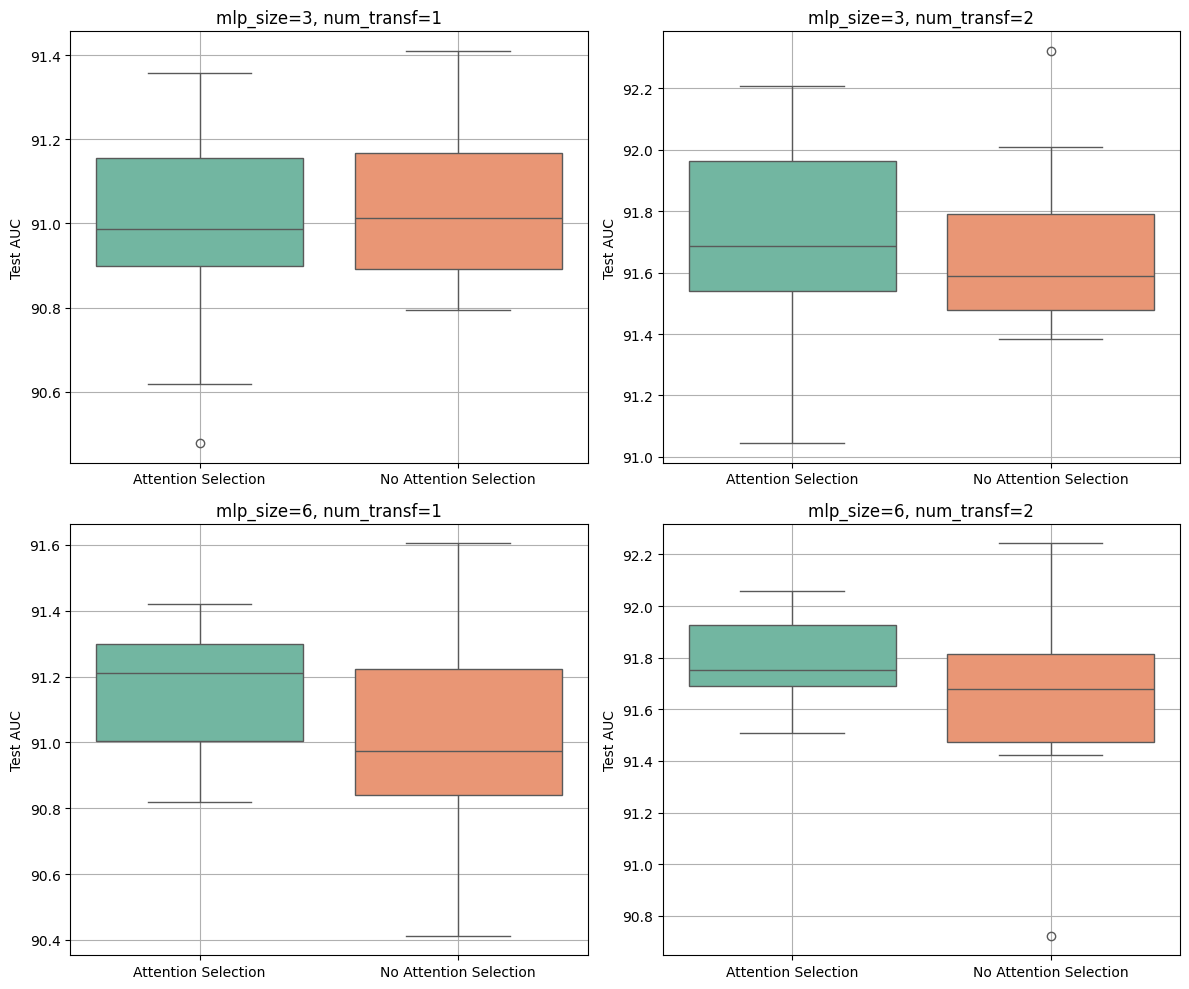

In [19]:
NoAttention = pd.DataFrame(results[1][0])
Attention = pd.DataFrame(results[0][0])

# Define the hyperparameter combinations
mlp_sizes = [3, 6]
num_transfs = [1, 2]

plot_2_boxplots(Attention, NoAttention, mlp_sizes, num_transfs)

Note: because of how the classifier works, for hyperparameter ''num_transf = 1'' Attention Selection and No Attention Selection methods do exactly the same, and any differences in their results are merely anecdotic.

In [20]:
def plot_3_boxplots(AttentionNoMLP, Attention, NoAttention, mlp_sizes, num_transfs):
    # Set up the nxm subplot grid
    fig, axes = plt.subplots(len(mlp_sizes), len(num_transfs), figsize=(len(mlp_sizes)*6, len(num_transfs)*5))

    if len(mlp_sizes) > 1 or len(num_transfs) > 1:
        axes = axes.flatten()  # Flatten to easily iterate

    for idx, (mlp, transf) in enumerate([(m, t) for m in mlp_sizes for t in num_transfs]):
        # Filter DataFrames
        att_no_mlp = AttentionNoMLP[(AttentionNoMLP['mlp_size'] == mlp) & (AttentionNoMLP['num_transf'] == transf)]
        att = Attention[(Attention['mlp_size'] == mlp) & (Attention['num_transf'] == transf)]
        noatt = NoAttention[(NoAttention['mlp_size'] == mlp) & (NoAttention['num_transf'] == transf)]

        # Create combined DataFrame
        df_plot = pd.DataFrame({
            'test_auc': pd.concat([ att_no_mlp['test_auc'] , att['test_auc'], noatt['test_auc']], ignore_index=True),
            'Condition': ['Attn Sel No MLP'] * len(att_no_mlp) + ['Attn Sel'] * len(att) + ['No Attention Selection'] * len(noatt)
        })

        # Plot
        if len(mlp_sizes) > 1 or len(num_transfs) > 1:
            sns.boxplot(x='Condition', y='test_auc', data=df_plot, palette='Set2', ax=axes[idx], hue = 'Condition')
            axes[idx].set_title(f"mlp_size={mlp}, num_transf={transf}")
            axes[idx].set_xlabel('')
            axes[idx].set_ylabel('Test AUC')
            axes[idx].grid(True)
        else:
            sns.boxplot(x='Condition', y='test_auc', data=df_plot, palette='Set2', ax=axes, hue = 'Condition')
            axes.set_title(f"mlp_size={mlp}, num_transf={transf}")
            axes.set_xlabel('')
            axes.set_ylabel('Test AUC')
            axes.grid(True)

    plt.tight_layout()
    plt.show()

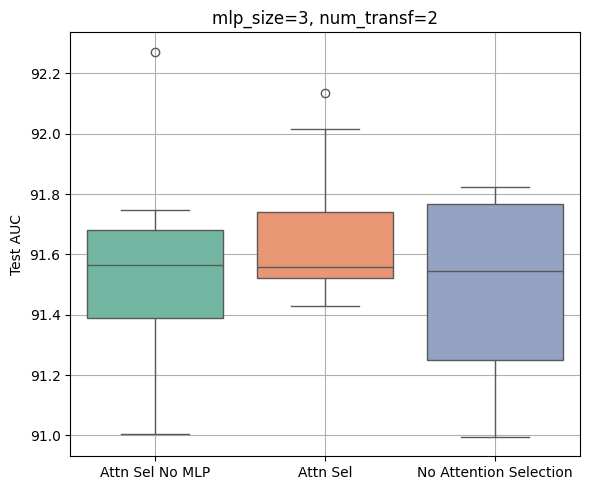

In [21]:
AttentionNoMLP = pd.read_csv('Attention_Selection_MLP_only_quant_or_not/MLP_only_quant/results_grid_search.csv')
Attention = pd.read_csv('Attention_Selection_MLP_only_quant_or_not/MLP_quant_plus_vanilla/results_grid_search.csv')
NoAttention = pd.read_csv('Attention_Selection_MLP_only_quant_or_not/NoAttention_MLP_only_quant/results_grid_search.csv')

mlp_sizes = [3]
num_transfs = [2]

plot_3_boxplots(AttentionNoMLP, Attention, NoAttention, mlp_sizes, num_transfs)

# FeedForward layer comparison

We want to study the behaveour of the model when we tweak the architecture of the FeedForward that is performed after the attention mechanism.

- First step (common to all): select top $N$ patches through attention score.

- Second step (common to all): forward the forementioned patches through QCircuit

- Third step:

    - Identity  : do nothing with non-selected patches and forward them to next layer after QCircuit.
    - Filter    : drop all non-selected patches 
    - NormalMLP : forward non-selected patches through a conventional MLP layer + dropout.

Additionally, for control we will compare all methods with the version that doesn't select the top $N$ patches through attention score (original).

In [22]:
def plot_4_boxplots(No_Attention, Attention_Id, Attention_MLP, Attention_Filter, mlp_sizes, num_transfs):
    # Set up the nxm subplot grid
    fig, axes = plt.subplots(len(mlp_sizes), len(num_transfs), figsize=(len(mlp_sizes)*6, len(num_transfs)*5))

    if len(mlp_sizes) > 1 or len(num_transfs) > 1:
        axes = axes.flatten()  # Flatten to easily iterate

    for idx, (mlp, transf) in enumerate([(m, t) for m in mlp_sizes for t in num_transfs]):
        # Filter DataFrames
        noatt = No_Attention[(No_Attention['mlp_size'] == mlp) & (No_Attention['num_transf'] == transf)]
        att_no_mlp = Attention_Id[(Attention_Id['mlp_size'] == mlp) & (Attention_Id['num_transf'] == transf)]
        att_mlp = Attention_MLP[(Attention_MLP['mlp_size'] == mlp) & (Attention_MLP['num_transf'] == transf)]
        att_filter = Attention_Filter[(Attention_Filter['mlp_size'] == mlp) & (Attention_Filter['num_transf'] == transf)]
        

        # Create combined DataFrame
        df_plot = pd.DataFrame({
            'test_auc': pd.concat([ noatt['test_auc'], att_no_mlp['test_auc'] , att_mlp['test_auc'], att_filter['test_auc']], ignore_index=True),
            'Condition': ['No Attn Sel'] * len(noatt) + ['Attn Sel No MLP'] * len(att_no_mlp) + ['Attn Sel + MLP'] * len(att_mlp) + [ 'Attn Sel + Filter'] * len(att_filter)
        })

        # Plot
        if len(mlp_sizes) > 1 or len(num_transfs) > 1:
            sns.boxplot(x='Condition', y='test_auc', data=df_plot, palette='Set2', ax=axes[idx], hue = 'Condition')
            axes[idx].set_title(f"mlp_size={mlp}, num_transf={transf}")
            axes[idx].set_xlabel('')
            axes[idx].set_ylabel('Test AUC')
            axes[idx].grid(True)
        else:
            sns.boxplot(x='Condition', y='test_auc', data=df_plot, palette='Set2', ax=axes, hue = 'Condition')
            axes.set_title(f"mlp_size={mlp}, num_transf={transf}")
            axes.set_xlabel('')
            axes.set_ylabel('Test AUC')
            axes.grid(True)

    plt.tight_layout()
    plt.show()

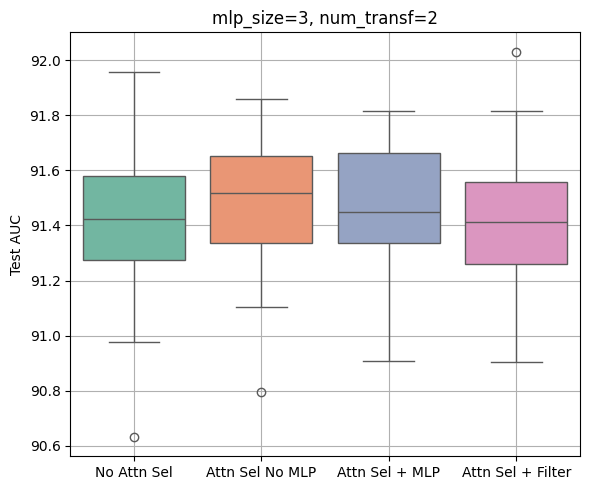

In [23]:
QCircuit_No_Attention_Selection = pd.read_csv('Architecture_Search_For_Attn_Selection_Model/QCircuit_No_Attention_Selection/results_grid_search.csv')
QCircuit_plus_Identity = pd.read_csv('Architecture_Search_For_Attn_Selection_Model/QCircuit_plus_Identity/results_grid_search.csv')
QCircuit_only_selected_patches = pd.read_csv('Architecture_Search_For_Attn_Selection_Model/QCircuit_only_selected_patches/results_grid_search.csv')
QCircuit_and_NormalMLP = pd.read_csv('Architecture_Search_For_Attn_Selection_Model/QCircuit_plus_Normal_MLP/results_grid_search.csv')

mlp_sizes = [3]
num_transfs = [2]

plot_4_boxplots(QCircuit_No_Attention_Selection, QCircuit_plus_Identity, QCircuit_and_NormalMLP, QCircuit_only_selected_patches, mlp_sizes, num_transfs)

Above we have a boxplot per architecture, regardless of entanglement. Below we'll explore what effect has the entanglement on each version.

In [24]:
def plot_boxplots(df_list, labels, value_column='value', separation='entangle', title = 'Boxplot comparison for different dataframes', horizontals = []):
    """
    Plots boxplots of 'value_column' for entangle == True and entangle == False,
    filtered by mlp_sizes and num_transfs, for each DataFrame in df_list.
    """
    combined_data = []
    
    for i, df in enumerate(df_list):
        # Filter the DataFrame
        filtered_df = df.copy()
        
        # Add identifying info for plotting
        filtered_df['DataFrame'] = labels[i]
        combined_data.append(filtered_df)
    
    # Combine all DataFrames
    all_data = pd.concat(combined_data, ignore_index=True)
    if separation == None:
        # Create plot
        plt.figure(figsize=(10, 6))
        sns.boxplot(
            data=all_data,
            x='DataFrame',
            y=value_column,
            hue= 'DataFrame',
            palette='Set2'
        )
    else:
        # Create plot
        plt.figure(figsize=(10, 6))
        sns.boxplot(
            data=all_data,
            x='DataFrame',
            y=value_column,
            hue=separation,
            palette='Set2'
        )
        plt.legend(title=separation)

    colors = ['tab:blue', 'tab:red', 'tab:green', 'tab:orange', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']

    if len(horizontals) > 0:
        for i, horizontal in enumerate(horizontals):
            plt.axhline(horizontal[0], linestyle='--', color = colors[i], label = horizontal[1])

    plt.legend()
    plt.title(title)
    plt.ylabel(value_column)
    plt.xlabel('DataFrame')
    plt.tight_layout()
    plt.show()

# Example usage:
# df_list = [df1, df2, df3]  # Replace with your list of DataFrames
# plot_entangle_boxplots(df_list)


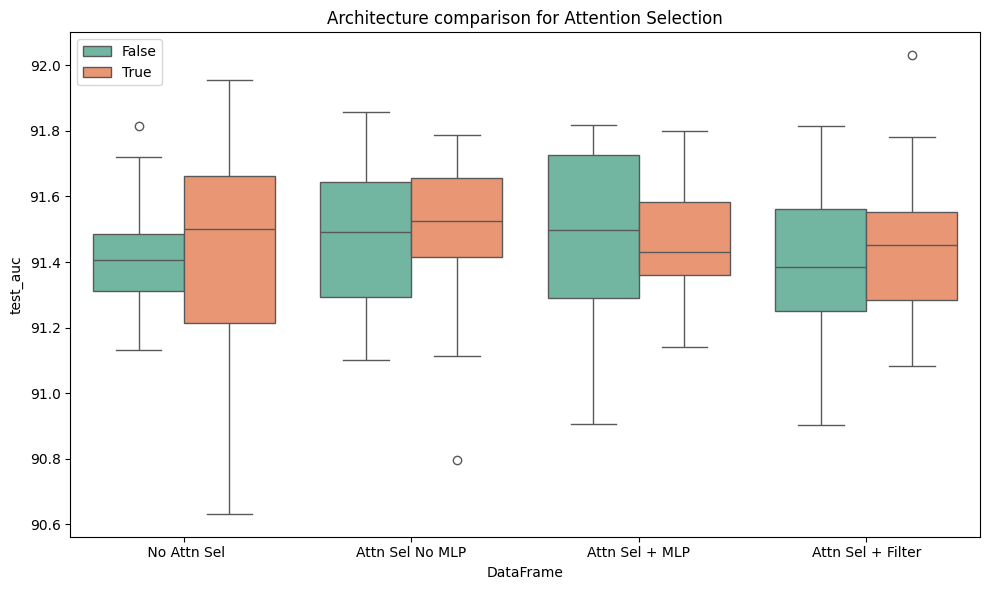

In [25]:
df_list = [QCircuit_No_Attention_Selection, QCircuit_plus_Identity, QCircuit_and_NormalMLP, QCircuit_only_selected_patches]
labels = [' No Attn Sel', 'Attn Sel No MLP', 'Attn Sel + MLP', 'Attn Sel + Filter']
plot_boxplots(df_list, labels = labels, value_column='test_auc',separation='entangle', title = 'Architecture comparison for Attention Selection')

# Fine tuning for last model (Attn Sel + Filter)

Despite processing significantly less information, it performs on par with other architectures and even produces the best-performing model, albeit as an outlier.

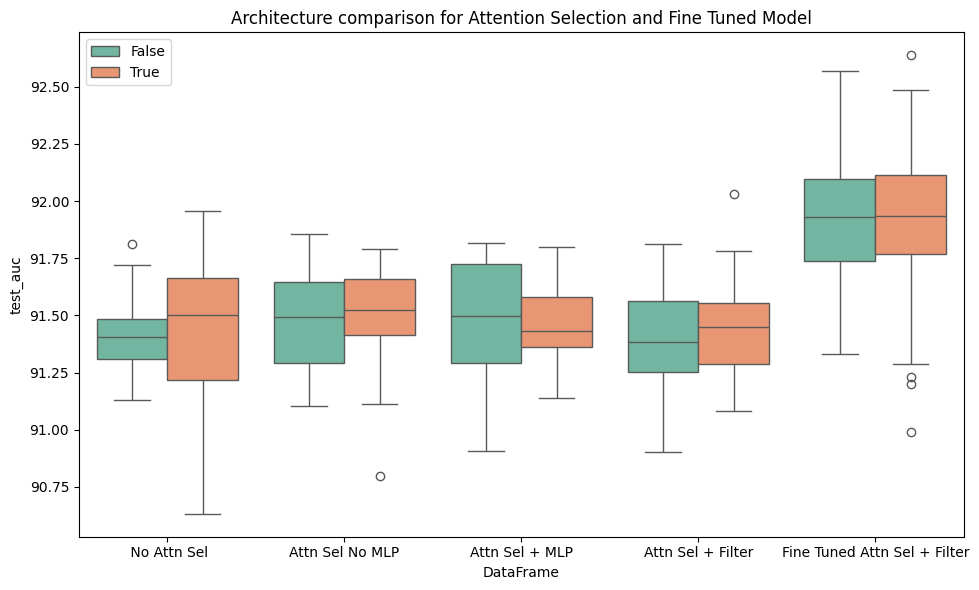

         test_auc    test_acc
count  196.000000  196.000000
mean    91.921431   74.331009
std      0.266492    0.747130
min     90.988274   72.418953
25%     91.762385   73.865337
50%     91.932804   74.264339
75%     92.105276   74.862843
max     92.637239   76.159601

Best Test AUC: 92.63723857410724 at index: 22

Best Test ACC: 76.15960099750623 at index: 15

Best Test MIX: 84.20403907700704 at index: 15

Best Model by Pondered Score has:
 Test AUC: 92.24847715650785
 Test ACC: 76.15960099750623
 Pondered Score: 84.20403907700704
 Other hyperparameters: idx                        15
learning_rate          0.0025
hidden_size                48
dropout                 0.225
num_head                    4
num_transf                  2
mlp_size                    3
patch_size                  4
weight_decay              0.0
attention_selection      True
filter_by_attention      True
entangle                False
strong                  False
mlp_only_quant           True
penny_or_kipu    

In [28]:
df_no_entanglement_qb_3_transf_2 = pd.read_csv( 'Hyperparameter_Tuning/mlp_size_is_3_num_transf_is_2_attn_sel_plus_attn_filter/No_Entanglement/results_grid_search.csv')
df_entanglement_qb_3_transf_2 = pd.read_csv( 'Hyperparameter_Tuning/mlp_size_is_3_num_transf_is_2_attn_sel_plus_attn_filter/Strong_Entanglement/results_grid_search.csv')

df_fine_tuned = pd.concat([df_no_entanglement_qb_3_transf_2, df_entanglement_qb_3_transf_2], ignore_index=True)

df_list = [QCircuit_No_Attention_Selection, QCircuit_plus_Identity, QCircuit_and_NormalMLP, QCircuit_only_selected_patches, df_fine_tuned]
labels = [' No Attn Sel', 'Attn Sel No MLP', 'Attn Sel + MLP', 'Attn Sel + Filter', 'Fine Tuned Attn Sel + Filter']
plot_boxplots(df_list, labels = labels, value_column='test_auc',separation='entangle', title = 'Architecture comparison for Attention Selection and Fine Tuned Model')

df_fine_tuned['pondered_score'] = (df_fine_tuned['test_auc'] + df_fine_tuned['test_acc'])/2


print(df_fine_tuned[['test_auc', 'test_acc']].describe())

print(f"\nBest Test AUC: {df_fine_tuned['test_auc'].max()} at index: {df_fine_tuned.loc[df_fine_tuned['test_auc'].idxmax()].iloc[0]}")
print(f"\nBest Test ACC: {df_fine_tuned['test_acc'].max()} at index: {df_fine_tuned.loc[df_fine_tuned['test_acc'].idxmax()].iloc[0]}")

pondered_max_index = df_fine_tuned.loc[df_fine_tuned['pondered_score'].idxmax()].iloc[0]
print(f"\nBest Test MIX: {df_fine_tuned['pondered_score'].max()} at index: {pondered_max_index}")

print(f"""
Best Model by Pondered Score has:
 Test AUC: {df_fine_tuned['test_auc'].iloc[pondered_max_index]}
 Test ACC: {df_fine_tuned['test_acc'].iloc[pondered_max_index]}
 Pondered Score: {df_fine_tuned['pondered_score'].iloc[pondered_max_index]}
 Other hyperparameters: {df_fine_tuned.iloc[pondered_max_index, :16]}
""")


# Study of Quantum Circuit architecture: 'pennylane' backend or 'kipu' backend

or in other words, train quantum layer or not during strong entangling. Used graph is the one resembling The Star of David

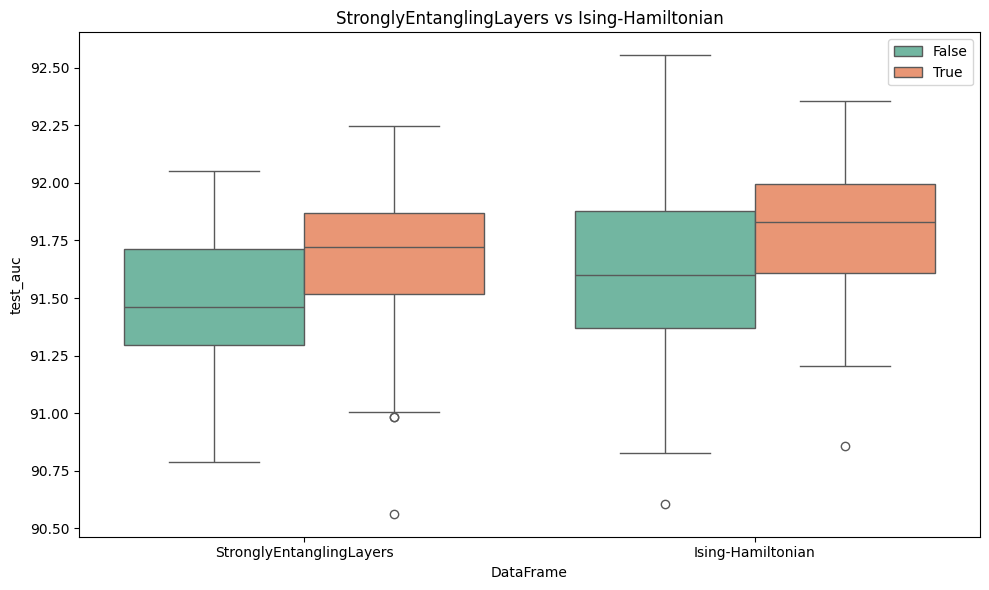

In [27]:
path_base = 'Kipu_or_Penny_StrongEnt/num_transf_3_num_qubits_6/'
penny_normal = pd.read_csv(path_base + 'StrongEntangling_Normal_Pennylane_Backend/results_grid_search.csv')
kipu_normal = pd.read_csv(path_base + 'StrongEntangling_Normal_Kipu_Backend/results_grid_search.csv')
penny_attn = pd.read_csv(path_base + 'StrongEntangling_Attention_Filtered_Pennylane_Backend/results_grid_search.csv')
kipu_attn = pd.read_csv(path_base + 'StrongEntangling_Attention_Filtered_Kipu_Backend/results_grid_search.csv')

penny = pd.concat([penny_normal, penny_attn], ignore_index=True)
kipu = pd.concat([kipu_normal, kipu_attn], ignore_index=True)

df_list = [penny, kipu]
labels = ['StronglyEntanglingLayers', 'Ising-Hamiltonian']
plot_boxplots(df_list, labels = labels, value_column='test_auc', separation='attention_selection', title = 'StronglyEntanglingLayers vs Ising-Hamiltonian')

# Reduce # of parameters & Dimensionality

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


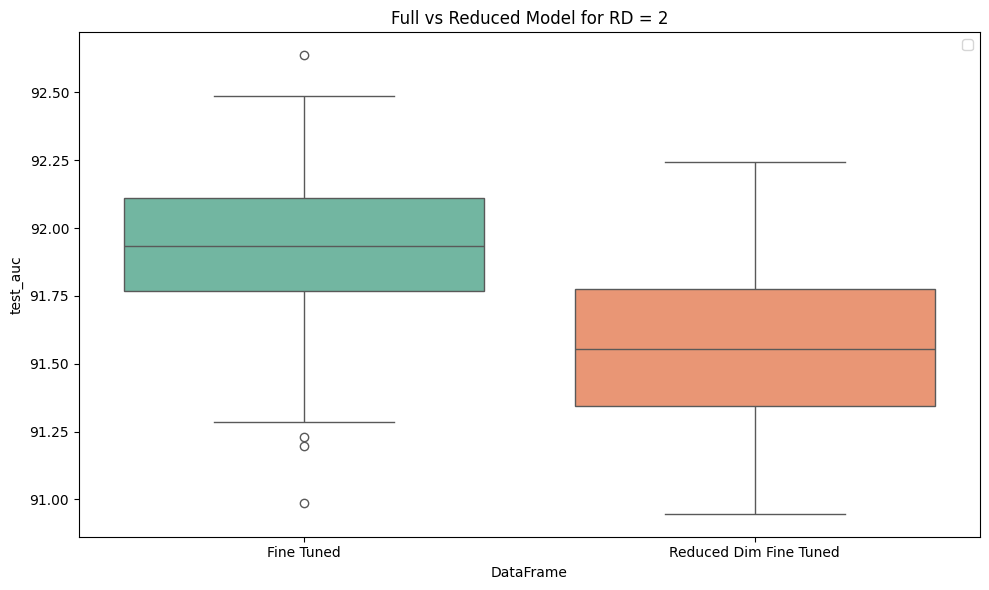

In [29]:
path_base = 'Hyperparameter_Tuning/mlp_size_is_3_num_transf_is_2_attn_sel_plus_attn_filter/'

df_entangle = pd.read_csv(path_base + 'Strong_Entanglement/results_grid_search.csv')
df_no_entangle = pd.read_csv(path_base + 'No_Entanglement/results_grid_search.csv')
df_fine_tuned = pd.concat([df_no_entangle, df_entangle], ignore_index=True)

df_reduced_dim_strong_entanglement = pd.read_csv(path_base + 'Reduced_Dim_Strong_Entanglement/results_grid_search.csv')

df_list = [df_entangle, df_reduced_dim_strong_entanglement]
labels = ['Fine Tuned', 'Reduced Dim Fine Tuned']
plot_boxplots(df_list, labels = labels, value_column='test_auc',separation=None, title = 'Full vs Reduced Model for RD = 2')



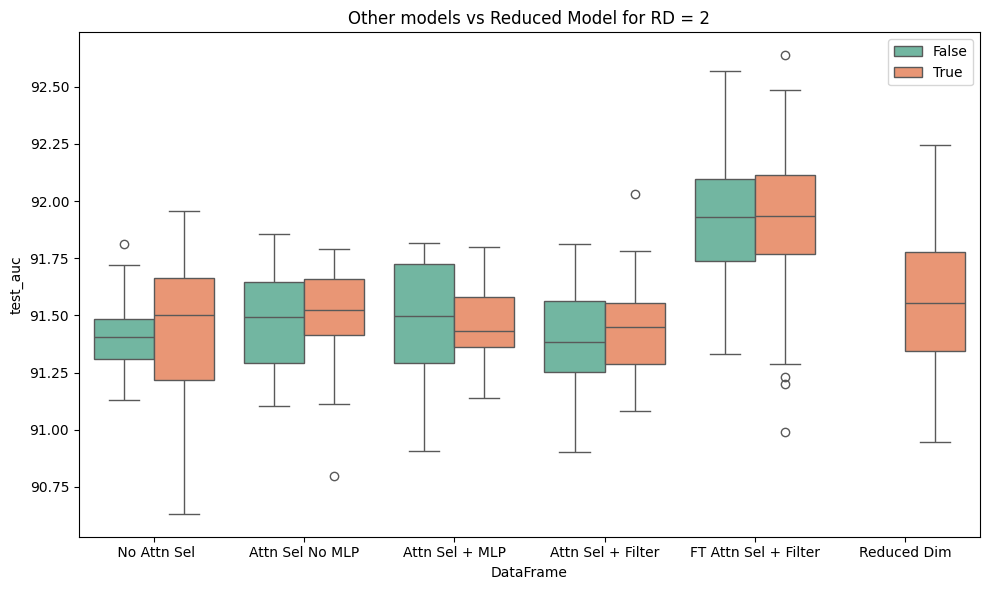


Number of parameters of each model:
No Attn Sel: 25117
Attn Sel No MLP: 25117
Attn Sel + MLP: 25117
Attn Sel + Filter: 25117
Fine Tuned Attn Sel + Filter: 25117
Fine Tuned Reduced Dim: 20329


In [30]:
df_list = [QCircuit_No_Attention_Selection, QCircuit_plus_Identity, QCircuit_and_NormalMLP, QCircuit_only_selected_patches, df_fine_tuned, df_reduced_dim_strong_entanglement]
labels = [' No Attn Sel', 'Attn Sel No MLP', 'Attn Sel + MLP', 'Attn Sel + Filter', 'FT Attn Sel + Filter', 'Reduced Dim']
plot_boxplots(df_list, labels = labels, value_column='test_auc',separation='entangle', title = 'Other models vs Reduced Model for RD = 2')

print('\nNumber of parameters of each model:')

print(f'No Attn Sel: {25117}')
print(f'Attn Sel No MLP: {25117}')
print(f'Attn Sel + MLP: {25117}')
print(f'Attn Sel + Filter: {25117}')
print(f'Fine Tuned Attn Sel + Filter: {25117}')
print(f'Fine Tuned Reduced Dim: {20329}')

# To do list:

- grid search time -Done
- RD grid search   - Done
- drop out embedding/ circuit / atenció /clasificador -Done
- sigmoide/activacions -Done
- aumentation? breast - How? Stand-By

# Grid Search for Time parameter in Hamiltonian evolution for the Strong Entangling Kipu Backend

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


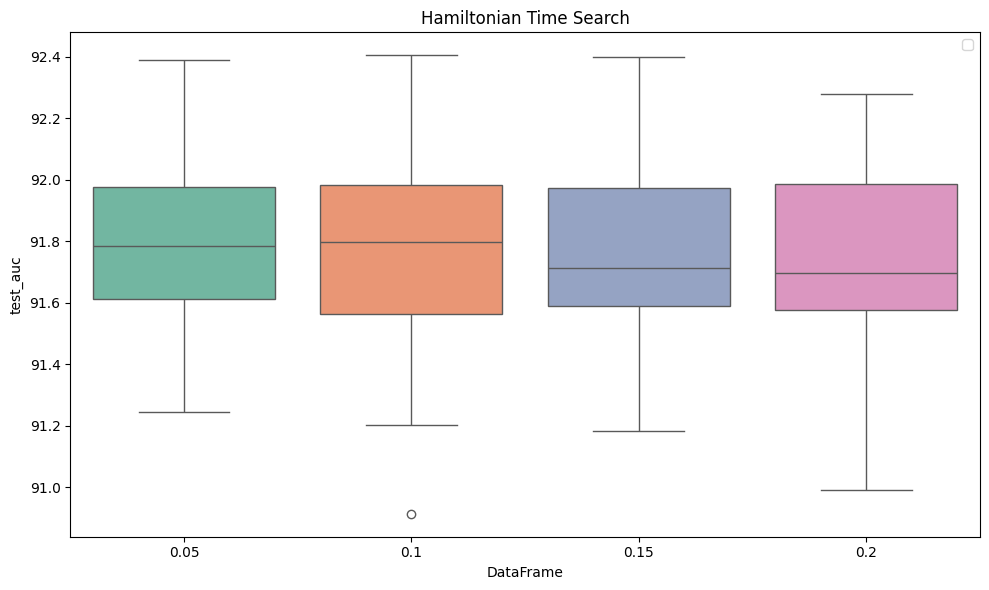

In [31]:
df_time_search = pd.read_csv('Hyperparameter_Tuning/mlp_size_is_3_num_transf_is_2_attn_sel_plus_attn_filter/Hamiltonian_Time_Search/results_grid_search.csv')

df_list_time = []

for t in np.unique(df_time_search['t']):
    df_list_time.append(df_time_search[df_time_search['t'] == t])

plot_boxplots(df_list_time, labels = ['0.05', '0.1', '0.15', '0.2'], value_column='test_auc', separation=None, title = 'Hamiltonian Time Search')

# Added activation function

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


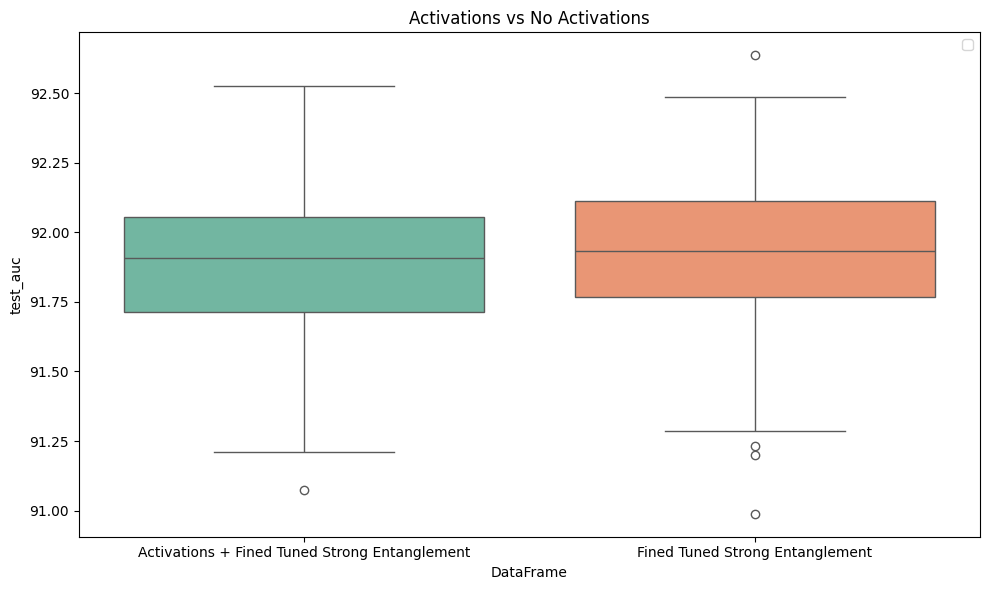

In [32]:
df_activation = pd.read_csv('Hyperparameter_Tuning/mlp_size_is_3_num_transf_is_2_attn_sel_plus_attn_filter/ActivationsAfterEachTransformer/results_grid_search.csv')

plot_boxplots([df_activation,df_entangle], labels = ['Activations + Fined Tuned Strong Entanglement', 'Fined Tuned Strong Entanglement'], value_column='test_auc', separation=None, title = 'Activations vs No Activations')

# Paralel vs Vertical:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


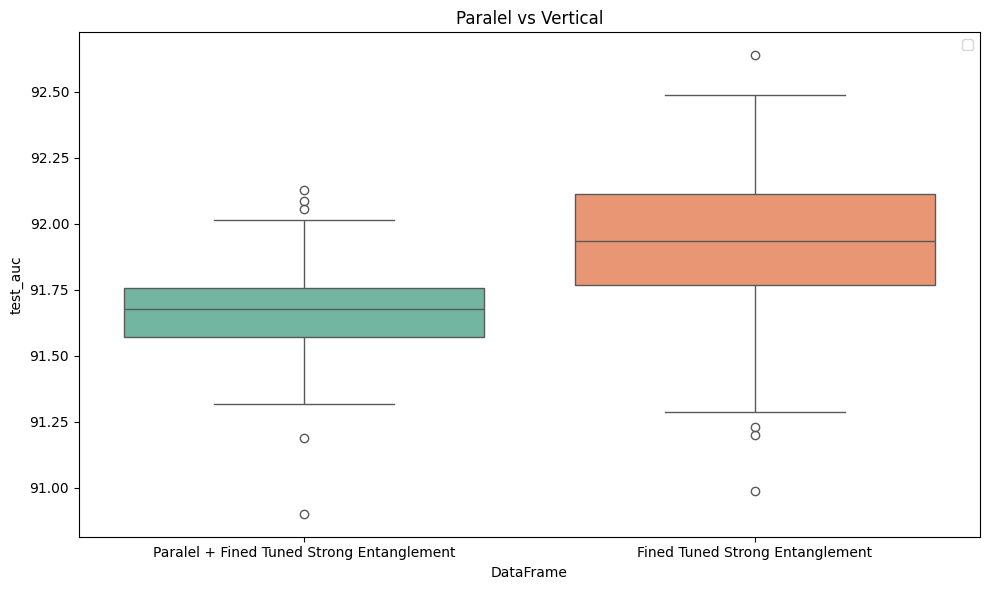

In [33]:
df_paralel = pd.read_csv('Hyperparameter_Tuning/mlp_size_is_3_num_transf_is_2_attn_sel_plus_attn_filter/Paralel_Transformers/results_grid_search.csv')
plot_boxplots([df_paralel,df_entangle], labels = ['Paralel + Fined Tuned Strong Entanglement', 'Fined Tuned Strong Entanglement'], value_column='test_auc', separation=None, title = 'Paralel vs Vertical')

# ($\lambda$) Focal Loss + $(1-\lambda)$ BCE as loss function (instead of only BCE)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


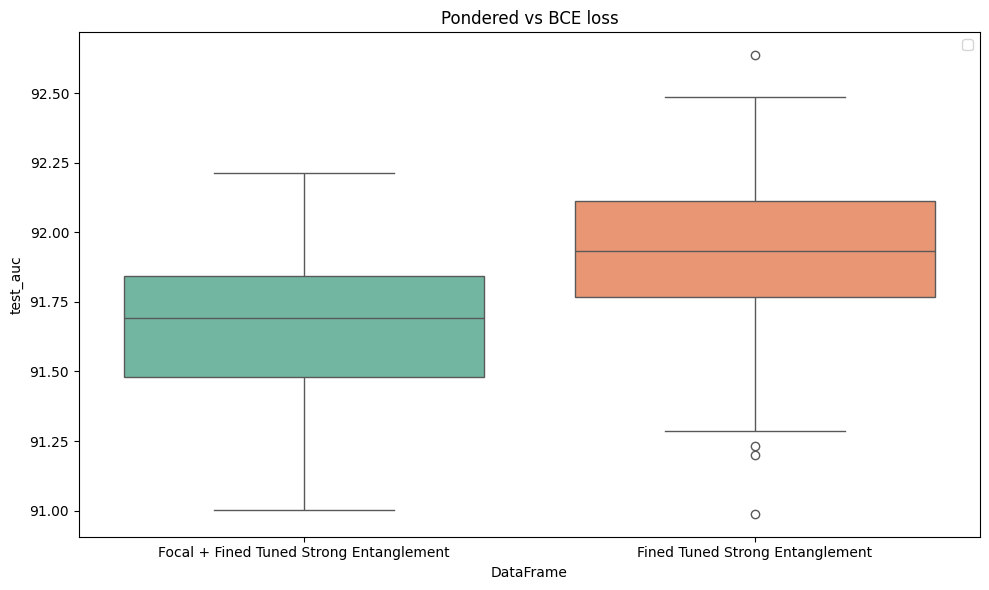

In [34]:
df_focal = pd.read_csv('Hyperparameter_Tuning/mlp_size_is_3_num_transf_is_2_attn_sel_plus_attn_filter/Focal/results_grid_search.csv')
plot_boxplots([df_focal,df_entangle], labels = ['Focal + Fined Tuned Strong Entanglement', 'Fined Tuned Strong Entanglement'], value_column='test_auc', separation=None, title = 'Pondered vs BCE loss')

# Paralel x Vertical (Transformer grids)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


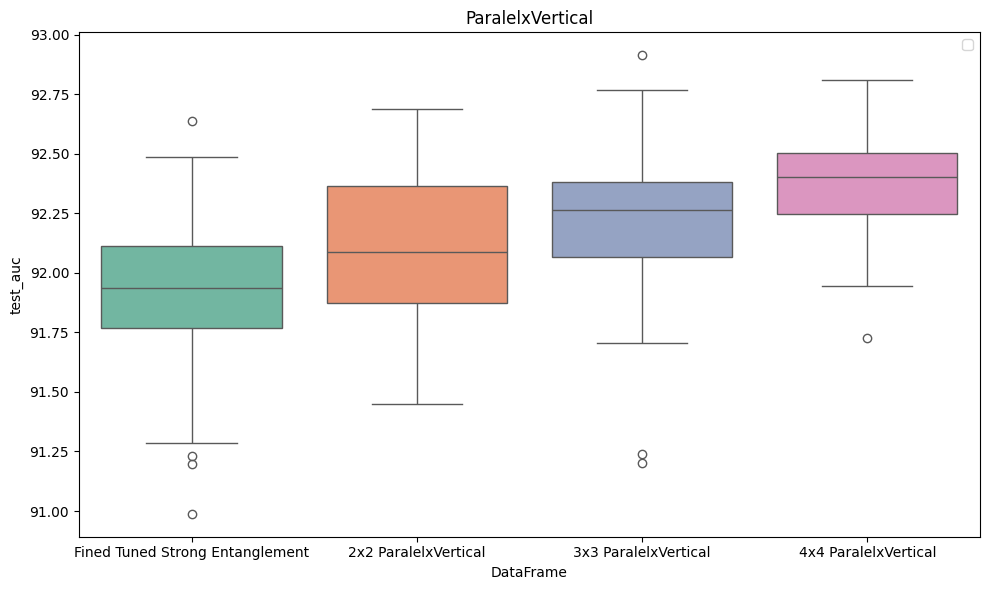

In [35]:
df_2x2 = pd.read_csv('Hyperparameter_Tuning/mlp_size_is_3_num_transf_is_2_attn_sel_plus_attn_filter/ParalelxVertical/2x2_ParalelxVertical/results_grid_search.csv')
df_3x3 = pd.read_csv('Hyperparameter_Tuning/mlp_size_is_3_num_transf_is_2_attn_sel_plus_attn_filter/ParalelxVertical/3x3_ParalelxVertical/results_grid_search.csv')
df_4x4 = pd.read_csv('Hyperparameter_Tuning/mlp_size_is_3_num_transf_is_2_attn_sel_plus_attn_filter/ParalelxVertical/4x4_ParalelxVertical/results_grid_search.csv')

df_list = [df_entangle,df_2x2,df_3x3,df_4x4]
labels = ['Fined Tuned Strong Entanglement', '2x2 ParalelxVertical', '3x3 ParalelxVertical', '4x4 ParalelxVertical']
plot_boxplots(df_list, labels = labels, value_column='test_auc', separation=None, title = 'ParalelxVertical')

# Convolutional Quantum Layer

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


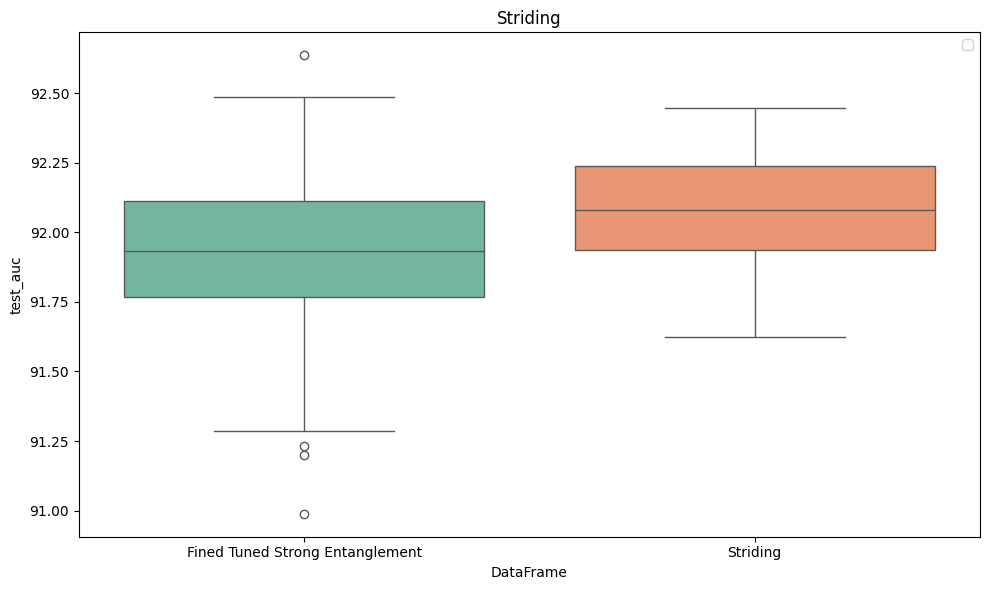

In [36]:
df_convolutional = pd.read_csv('Hyperparameter_Tuning/mlp_size_is_3_num_transf_is_2_attn_sel_plus_attn_filter/Convolutional/results_grid_search.csv')

df_list = [df_entangle, df_convolutional]
labels = ['Fined Tuned Strong Entanglement', 'Striding']
plot_boxplots(df_list, labels = labels, value_column='test_auc', separation=None, title = 'Striding')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


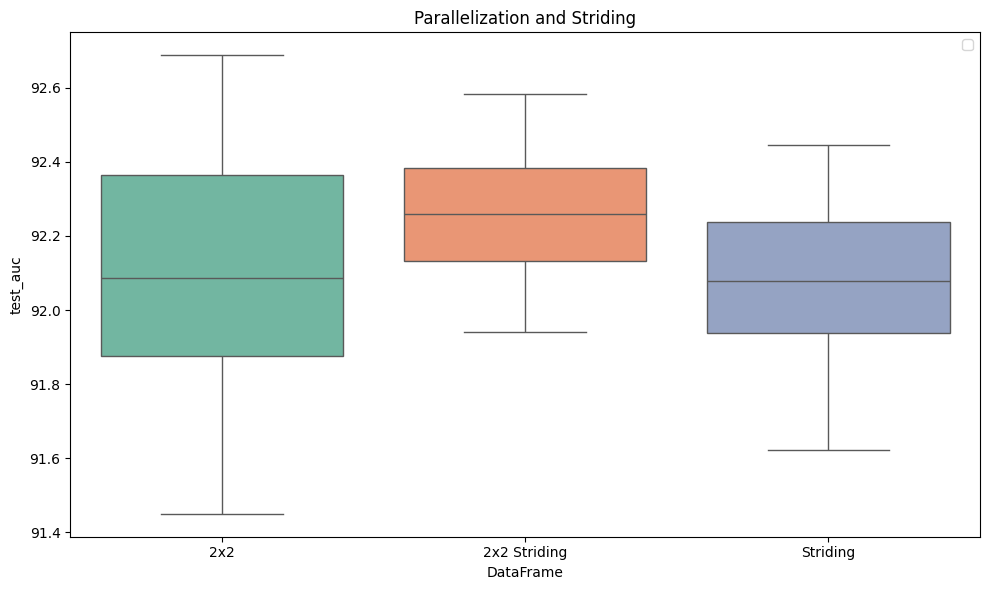

In [37]:
df_2x2_conv = pd.read_csv('Hyperparameter_Tuning/mlp_size_is_3_num_transf_is_2_attn_sel_plus_attn_filter/2x2_Convolutional/results_grid_search.csv')
df_list = [df_2x2, df_2x2_conv, df_convolutional]
labels = ['2x2', '2x2 Striding', 'Striding']

plot_boxplots(df_list, labels = labels, value_column='test_auc', separation=None, title = 'Parallelization and Striding')

# Low vs High Q Stride

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


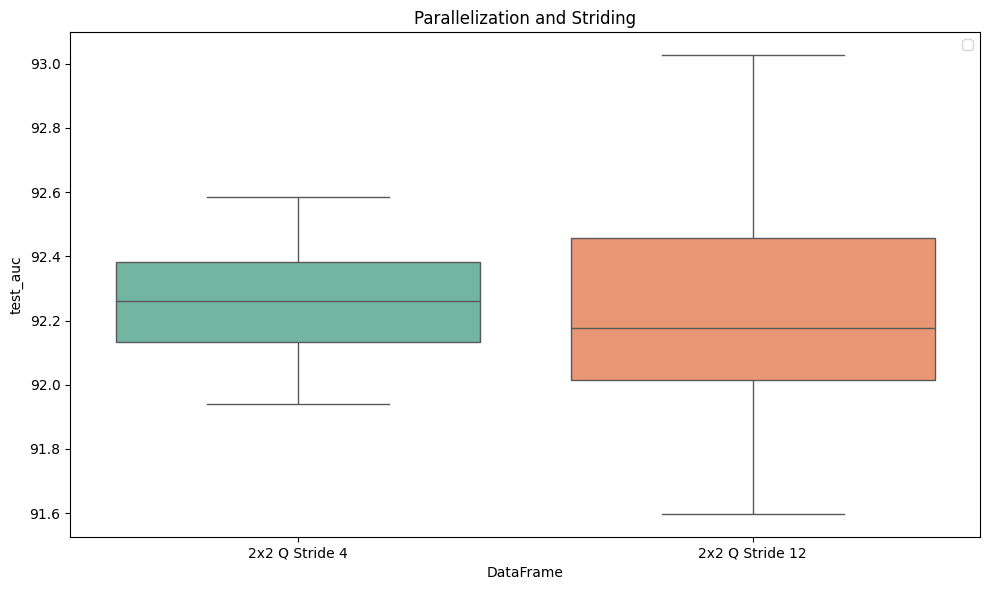

In [38]:
df_2x2_conv_q_stride12 = pd.read_csv('Hyperparameter_Tuning/mlp_size_is_3_num_transf_is_2_attn_sel_plus_attn_filter/2x2_Convolutional_Q_Stride_12/results_grid_search.csv')
df_list = [df_2x2_conv, df_2x2_conv_q_stride12]
labels = ['2x2 Q Stride 4', '2x2 Q Stride 12']

plot_boxplots(df_list, labels = labels, value_column='test_auc', separation=None, title = 'Parallelization and Striding')

# Graph search for higher mlp_size values

Try chain aswell

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


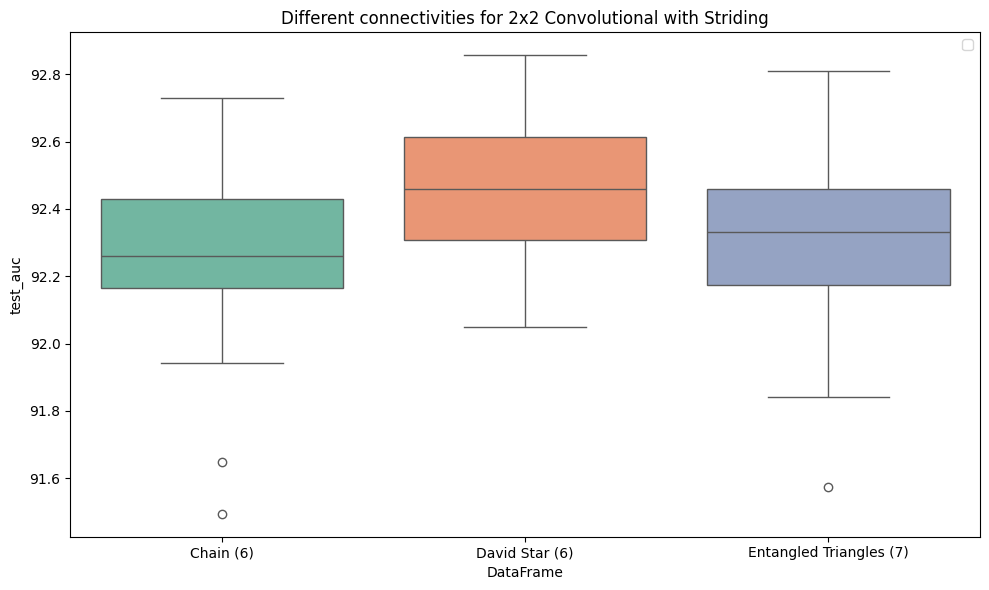

In [39]:
df_2x2_conv_stride_david_star = pd.read_csv('Hyperparameter_Tuning/mlp_size_is_3_num_transf_is_2_attn_sel_plus_attn_filter/2x2_Convolutional_6_Qubits/David_Star/results_grid_search.csv')
df_2x2_conv_stride_entang_triangles = pd.read_csv('Hyperparameter_Tuning/mlp_size_is_3_num_transf_is_2_attn_sel_plus_attn_filter/2x2_Convolutional_6_Qubits/Entangled_Triangles/results_grid_search.csv')
df_2x2_conv_stride_chain = pd.read_csv('Hyperparameter_Tuning/mlp_size_is_3_num_transf_is_2_attn_sel_plus_attn_filter/2x2_Convolutional_6_Qubits/Chain/results_grid_search.csv')

df_list = [ df_2x2_conv_stride_chain, df_2x2_conv_stride_david_star, df_2x2_conv_stride_entang_triangles]
labels = ['Chain (6)', 'David Star (6)', 'Entangled Triangles (7)']

plot_boxplots(df_list, labels = labels, value_column='test_auc', separation=None, title = 'Different connectivities for 2x2 Convolutional with Striding')

# CRX instead of CRZ in QuantumLayer

# To Do List:
- In general:
    - Try same number of transformers in paralel instead of in sequence - Done
    - Try different connectivity graphs for higher values of mlp_size - WIP
- Solving unbalanced classes:
    - Data augmentation for disbalanced classes? But how?
    - Tweak loss function (pondered loss between BCE and FocalLoss) - Done
    - Train 2 models, first discern majority class from the rest, then apply multiclass classification for the others. -Done

# Sanity check: Classical Counterpart in equal terms

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


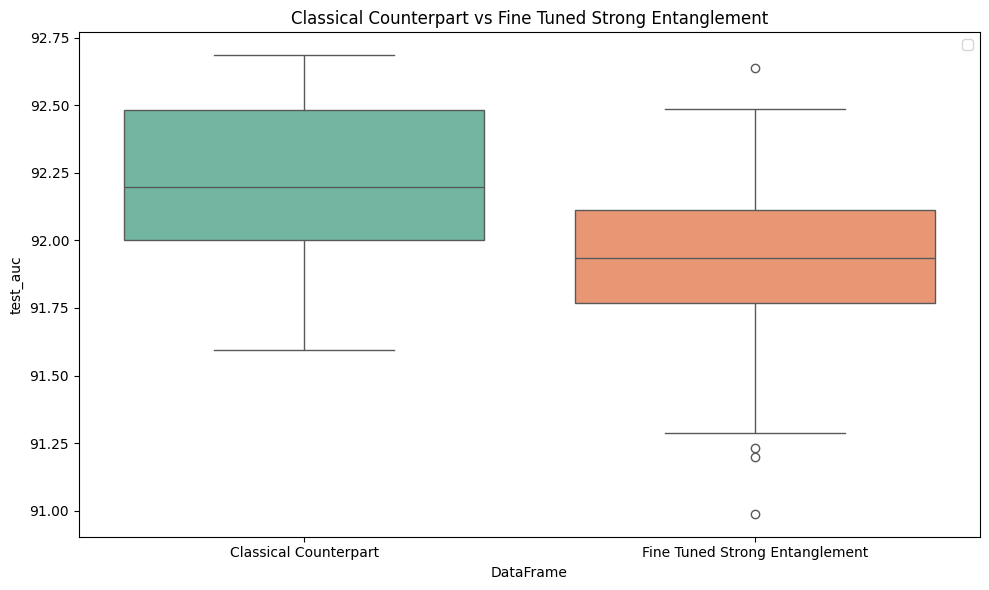

In [40]:
df_classical_counterpart = pd.read_csv('Hyperparameter_Tuning/mlp_size_is_3_num_transf_is_2_attn_sel_plus_attn_filter/Classical_Counterpart/Fine_Tuned/results_grid_search.csv')

df_list = [df_classical_counterpart, df_entangle]
labels = ['Classical Counterpart', 'Fine Tuned Strong Entanglement']

plot_boxplots(df_list, labels = labels, value_column='test_auc', separation=None, title = 'Classical Counterpart vs Fine Tuned Strong Entanglement')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


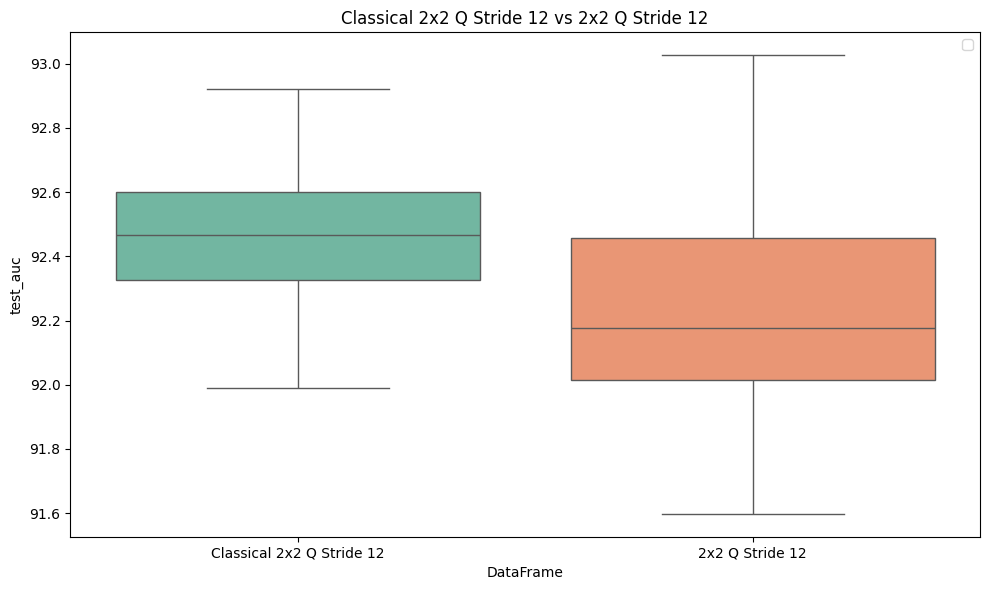

In [41]:
df_2x2_conv_q_stride12_classical = pd.read_csv('Hyperparameter_Tuning/mlp_size_is_3_num_transf_is_2_attn_sel_plus_attn_filter/Classical_Counterpart/BestSingularSoFar_Q_Stride_12_Par_2/results_grid_search.csv')

df_list = [df_2x2_conv_q_stride12_classical, df_2x2_conv_q_stride12]
labels = ['Classical 2x2 Q Stride 12', '2x2 Q Stride 12']

plot_boxplots(df_list, labels = labels, value_column='test_auc', separation=None, title = 'Classical 2x2 Q Stride 12 vs 2x2 Q Stride 12')


# Comparison between grids Fine_Tuned (1 x 1), 2 x 2, 3 x 3 and 4 x 4.

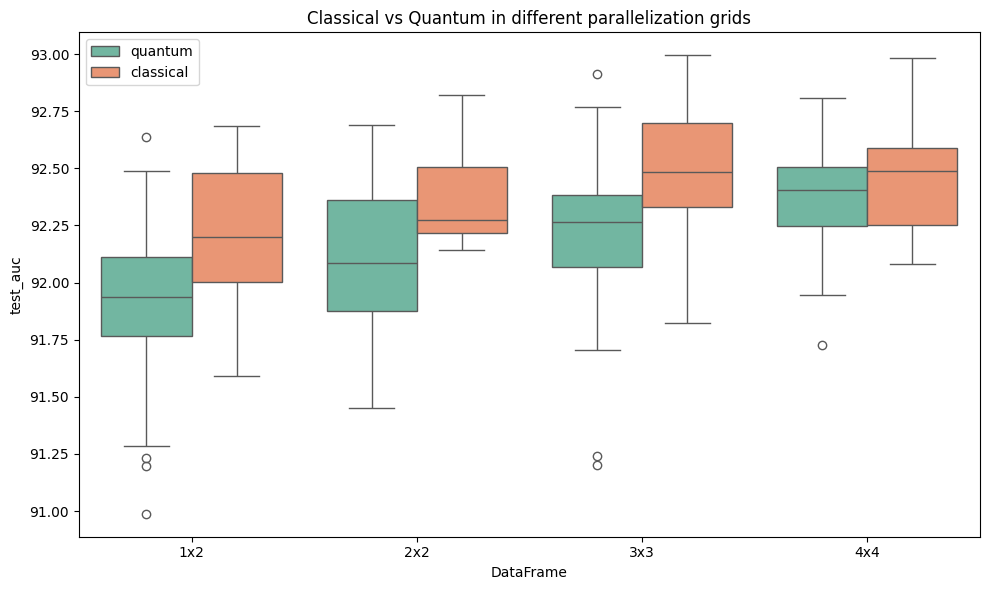

In [42]:
df_2x2_classical = pd.read_csv('Hyperparameter_Tuning/mlp_size_is_3_num_transf_is_2_attn_sel_plus_attn_filter/Classical_Counterpart/2x2/results_grid_search.csv')
df_3x3_classical = pd.read_csv('Hyperparameter_Tuning/mlp_size_is_3_num_transf_is_2_attn_sel_plus_attn_filter/Classical_Counterpart/3x3/results_grid_search.csv')
df_4x4_classical = pd.read_csv('Hyperparameter_Tuning/mlp_size_is_3_num_transf_is_2_attn_sel_plus_attn_filter/Classical_Counterpart/4x4/results_grid_search.csv')

# Add version column
df_entangle['version'] = 'quantum'
df_classical_counterpart['version'] = 'classical'

df_2x2['version'] = 'quantum'
df_2x2_classical['version'] = 'classical'

df_3x3['version'] = 'quantum'
df_3x3_classical['version'] = 'classical'

df_4x4['version'] = 'quantum'
df_4x4_classical['version'] = 'classical'

# Concatenate
df_1x1_merged = pd.concat([df_entangle, df_classical_counterpart], ignore_index=True)
df_2x2_merged = pd.concat([df_2x2, df_2x2_classical], ignore_index=True)
df_3x3_merged = pd.concat([df_3x3, df_3x3_classical], ignore_index=True)
df_4x4_merged = pd.concat([df_4x4, df_4x4_classical], ignore_index=True)

df_list = [df_1x1_merged,df_2x2_merged, df_3x3_merged, df_4x4_merged]
labels = ['1x2', '2x2', '3x3', '4x4']

plot_boxplots(df_list, labels = labels, value_column='test_auc', separation='version', title = 'Classical vs Quantum in different parallelization grids')

# Quantum classifier at the end or not

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


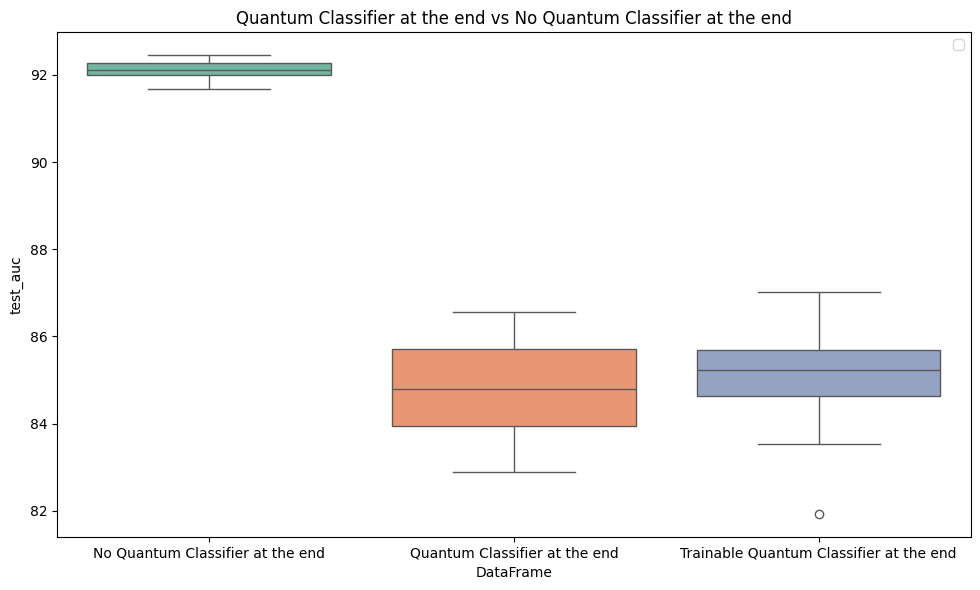

In [43]:
df_classifier_at_end = pd.read_csv('Hyperparameter_Tuning/mlp_size_is_3_num_transf_is_2_attn_sel_plus_attn_filter/QuantumClassifierAtTheEnd/results_grid_search.csv')
df_classifier_q_train = pd.read_csv('Hyperparameter_Tuning/mlp_size_is_3_num_transf_is_2_attn_sel_plus_attn_filter/QuantumClassifierAtTheEnd/Train/results_grid_search.csv')

df_list = [ df_classifier_at_end[ df_classifier_at_end['quantum_classification']==False], df_classifier_at_end[ df_classifier_at_end['quantum_classification']==True], df_classifier_q_train]
labels = ['No Quantum Classifier at the end', 'Quantum Classifier at the end', 'Trainable Quantum Classifier at the end']

plot_boxplots(df_list, labels = labels, value_column='test_auc', separation=None, title = 'Quantum Classifier at the end vs No Quantum Classifier at the end')

# (RBF + linear) hybrid similarity in attention

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


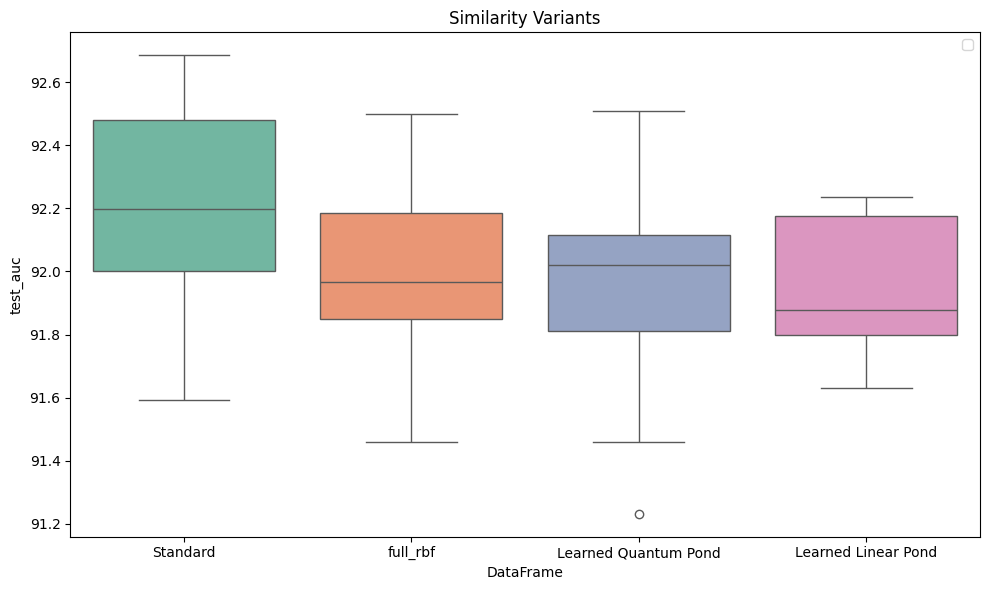

In [44]:
data_RBF_linear_none = pd.read_csv('Hyperparameter_Tuning/mlp_size_is_3_num_transf_is_2_attn_sel_plus_attn_filter/SimilarityVariants_Linear_or_RBF/none/results_grid_search.csv')
data_RBF_linear_full_rbf = pd.read_csv('Hyperparameter_Tuning/mlp_size_is_3_num_transf_is_2_attn_sel_plus_attn_filter/SimilarityVariants_Linear_or_RBF/full_rbf/results_grid_search.csv')
data_RBF_linear_learn = pd.read_csv('Hyperparameter_Tuning/mlp_size_is_3_num_transf_is_2_attn_sel_plus_attn_filter/SimilarityVariants_Linear_or_RBF/learnponderation/results_grid_search.csv')

df_list = [data_RBF_linear_none, data_RBF_linear_full_rbf, data_RBF_linear_learn[data_RBF_linear_learn['RBF_similarity']=='quantum'], data_RBF_linear_learn[data_RBF_linear_learn['RBF_similarity']=='linear']]
labels = ['Standard', 'full_rbf', 'Learned Quantum Pond', 'Learned Linear Pond']

plot_boxplots(df_list, labels = labels, value_column='test_auc', separation=None, title = 'Similarity Variants')

Having explored all (or at least almost every) possibilities of the CQ arquitecture (classical data with quantum model) we conclude that the experiments point to CQ being inferior to CC (classical data + classical model).
We hereby explore the QC (Quantum Data with Classical Model) variant.

# Last Hopes, modifying Quantum Circuit

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


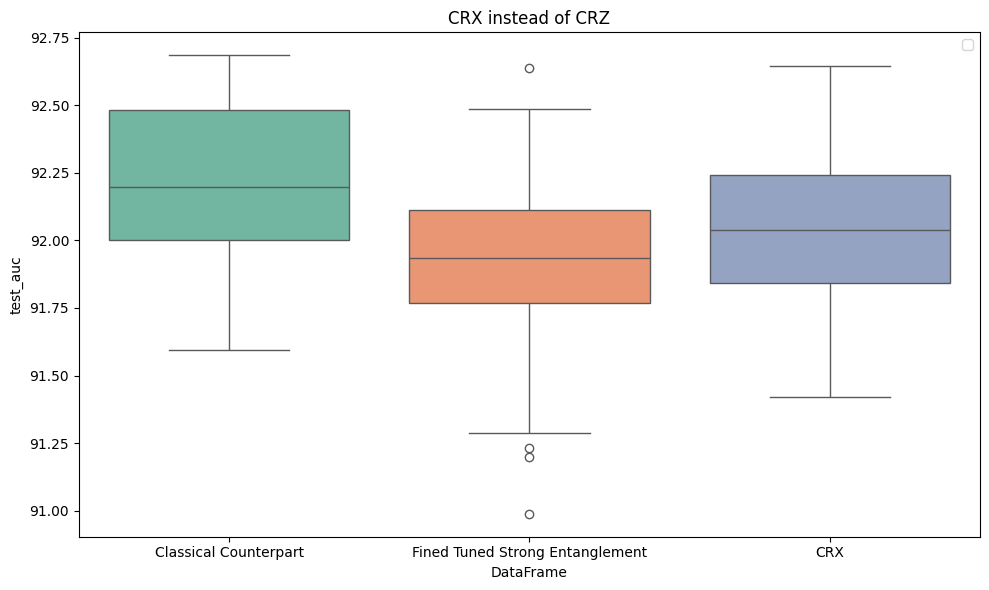

In [45]:
df_crx = pd.read_csv('Hyperparameter_Tuning/mlp_size_is_3_num_transf_is_2_attn_sel_plus_attn_filter/Circuit_Fine_Tuning/CRX_instead_of_CRZ/results_grid_search.csv')
df_list = [df_classical_counterpart, df_entangle, df_crx]
labels = ['Classical Counterpart','Fined Tuned Strong Entanglement', 'CRX']

plot_boxplots(df_list, labels = labels, value_column='test_auc', separation=None, title = 'CRX instead of CRZ')

# X Embedding instead of Y

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


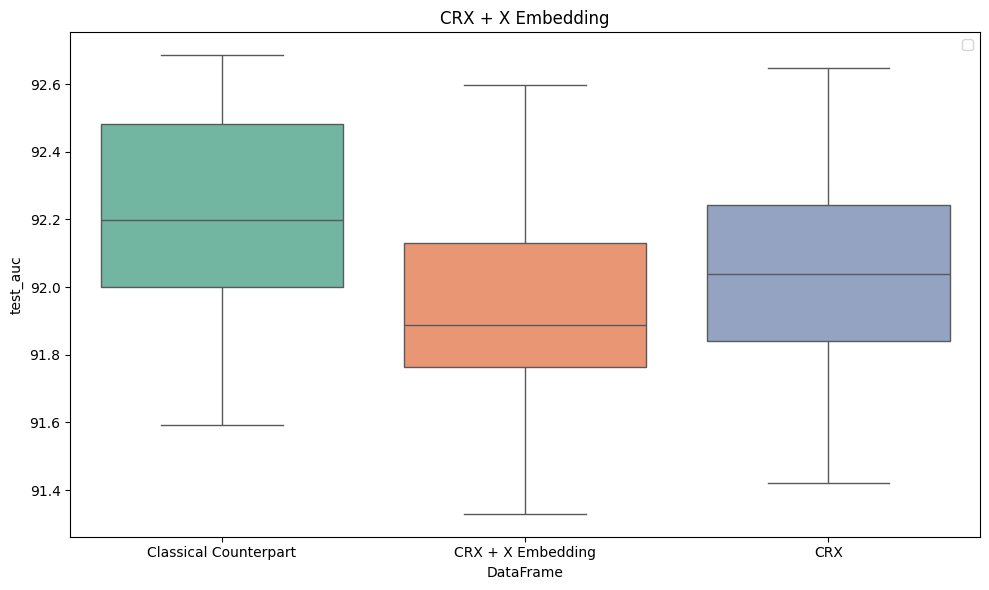

In [46]:
df_embedX = pd.read_csv('Hyperparameter_Tuning/mlp_size_is_3_num_transf_is_2_attn_sel_plus_attn_filter/Circuit_Fine_Tuning/CRX_plus_X_Embedding/results_grid_search.csv')
df_embedY = df_crx
df_list = [df_classical_counterpart,df_embedX, df_embedY]
labels = ['Classical Counterpart', 'CRX + X Embedding', 'CRX']

plot_boxplots(df_list, labels = labels, value_column='test_auc', separation=None, title = 'CRX + X Embedding')

# CRX (Y embedding) + Hadamard on non-control Qubit after entanglement

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


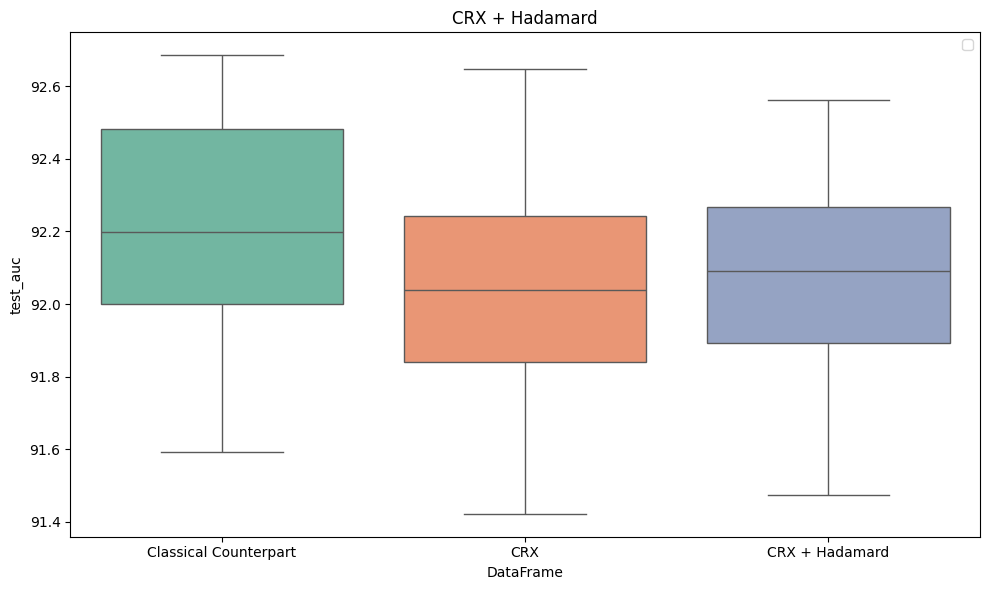

In [47]:
df_crx_hadamard = pd.read_csv('Hyperparameter_Tuning/mlp_size_is_3_num_transf_is_2_attn_sel_plus_attn_filter/Circuit_Fine_Tuning/CRX_plus_Hadamard/results_grid_search.csv')
df_list = [df_classical_counterpart, df_crx, df_crx_hadamard]
labels = ['Classical Counterpart', 'CRX', 'CRX + Hadamard']

plot_boxplots(df_list, labels = labels, value_column='test_auc', separation=None, title = 'CRX + Hadamard')

# What about changing t?

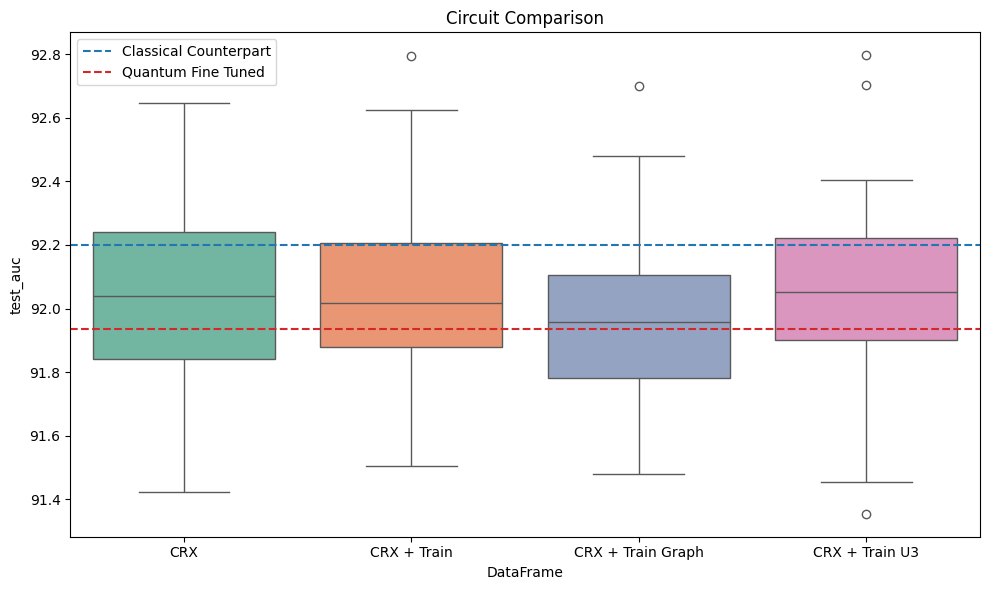

91.95892731364182
92.05163169354091
91.97900574156807
92.04380861645517


In [50]:

crx_training = pd.read_csv('Hyperparameter_Tuning/mlp_size_is_3_num_transf_is_2_attn_sel_plus_attn_filter/Circuit_Fine_Tuning/CRX_plus_training/results_grid_search.csv')
crx_training_only_graph = pd.read_csv('Hyperparameter_Tuning/mlp_size_is_3_num_transf_is_2_attn_sel_plus_attn_filter/Circuit_Fine_Tuning/CRX_plus_training_only_graph/results_grid_search.csv')
crx_training_only_U3 = pd.read_csv('Hyperparameter_Tuning/mlp_size_is_3_num_transf_is_2_attn_sel_plus_attn_filter/Circuit_Fine_Tuning/CRX_plus_training_only_U3/results_grid_search.csv')
df_list = [df_crx, crx_training, crx_training_only_graph, crx_training_only_U3]
labels = ['CRX', 'CRX + Train', 'CRX + Train Graph', 'CRX + Train U3']

plot_boxplots(df_list, labels = labels, value_column='test_auc', separation=None, title = 'Circuit Comparison', horizontals = [[ np.median(df_classical_counterpart['test_auc']),'Classical Counterpart'], [np.median(df_entangle['test_auc']), 'Quantum Fine Tuned'] ] )

print(np.median(crx_training_only_graph['test_auc']))
print(np.median(crx_training_only_U3['test_auc']))
print(np.mean(crx_training_only_graph['test_auc']))
print(np.mean(crx_training_only_U3['test_auc']))

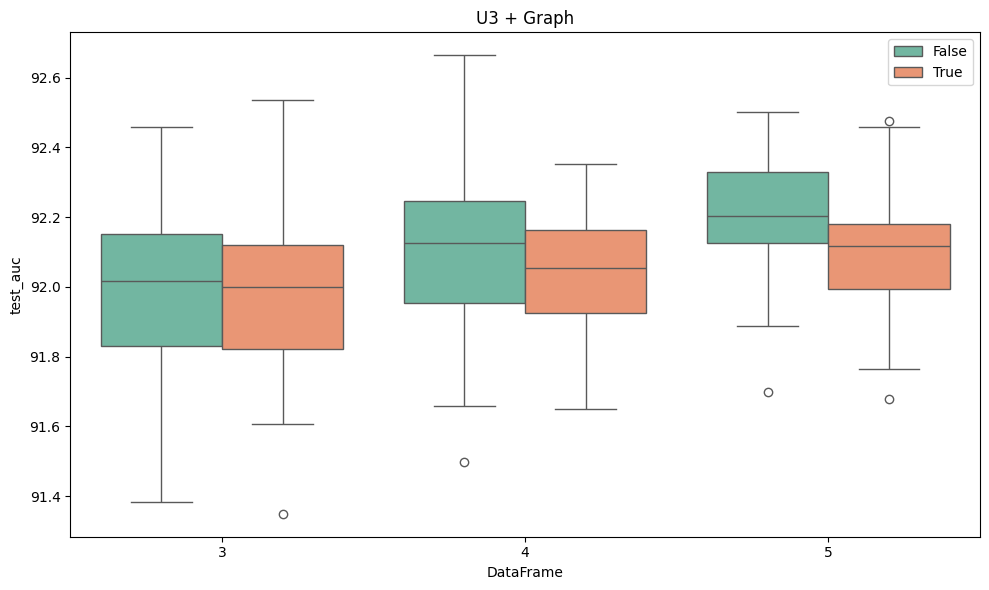

In [51]:
df_3_to_5 = pd.read_csv('Hyperparameter_Tuning/mlp_size_f_3_t_8_classical_vs_quantum/quantum_training_set_to_U3_plus_graph/results_grid_search.csv')

df_list = [df_3_to_5[df_3_to_5['mlp_size']==3], df_3_to_5[df_3_to_5['mlp_size']==4], df_3_to_5[df_3_to_5['mlp_size']==5]]
labels = ['3', '4', '5']

plot_boxplots(df_list, labels = labels, value_column='test_auc', separation="quantum_mlp", title = 'U3 + Graph')


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


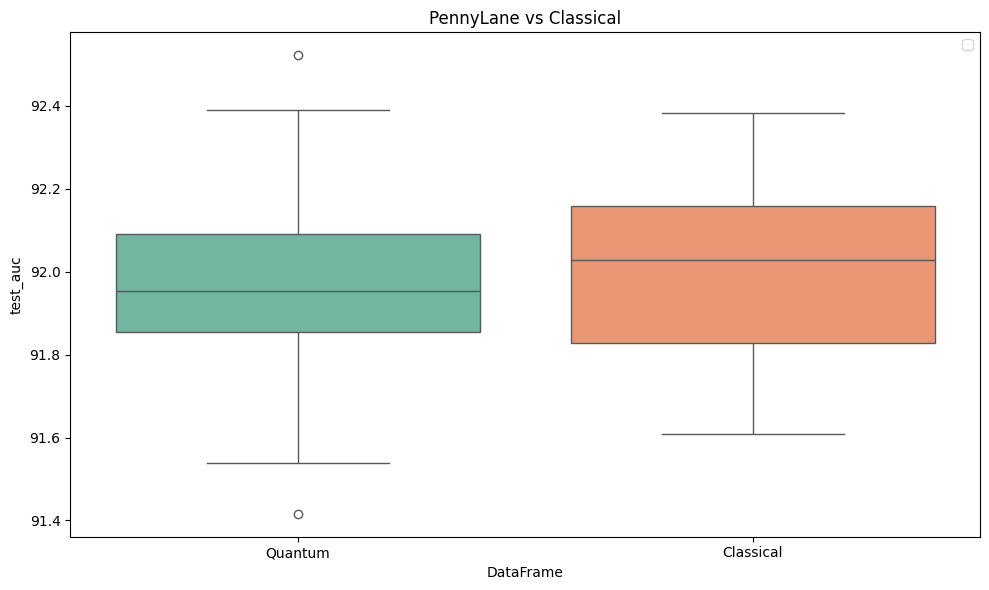

In [52]:
pennylane_vs_class = pd.read_csv('Hyperparameter_Tuning/PennyLaneEntangling/2qubits/results_grid_search.csv')

df_list = [pennylane_vs_class[pennylane_vs_class['quantum_mlp']==True], pennylane_vs_class[pennylane_vs_class['quantum_mlp']==False]]
labels = ['Quantum', 'Classical']

plot_boxplots(df_list, labels = labels, value_column='test_auc', separation=None, title = 'PennyLane vs Classical')

# MLP_size for classical transformer

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


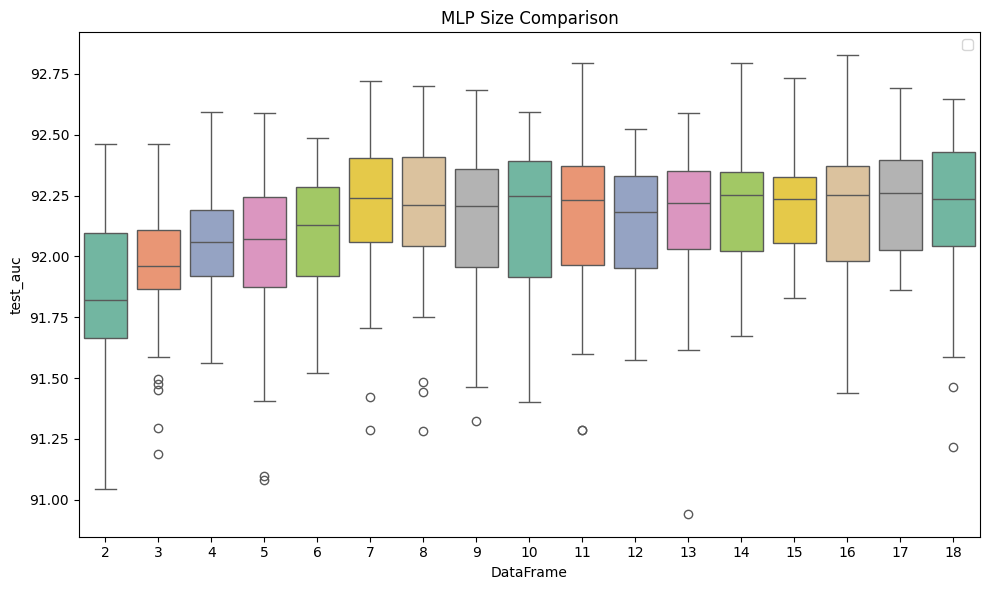

In [53]:
df_mlp_size = pd.read_csv('Hyperparameter_Tuning/classical_mlp_size/results_grid_search.csv')

df_list = []
labels = []
for size in range(2,19):
    df_list.append(df_mlp_size[df_mlp_size['mlp_size'] == size])
    labels.append(str(size))

plot_boxplots(df_list, labels = labels, value_column='test_auc', separation=None, title = 'MLP Size Comparison')

In [54]:
df_david_star_vs_linear = pd.read_csv('Hyperparameter_Tuning/david_star_vs_6_linear/results_grid_search.csv')

# Quantum Data

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


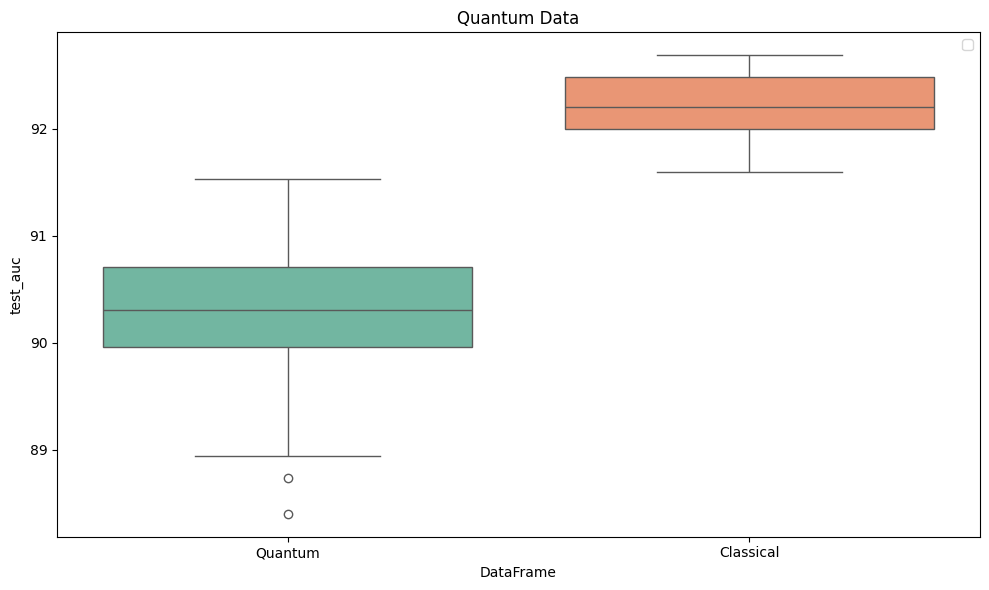

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


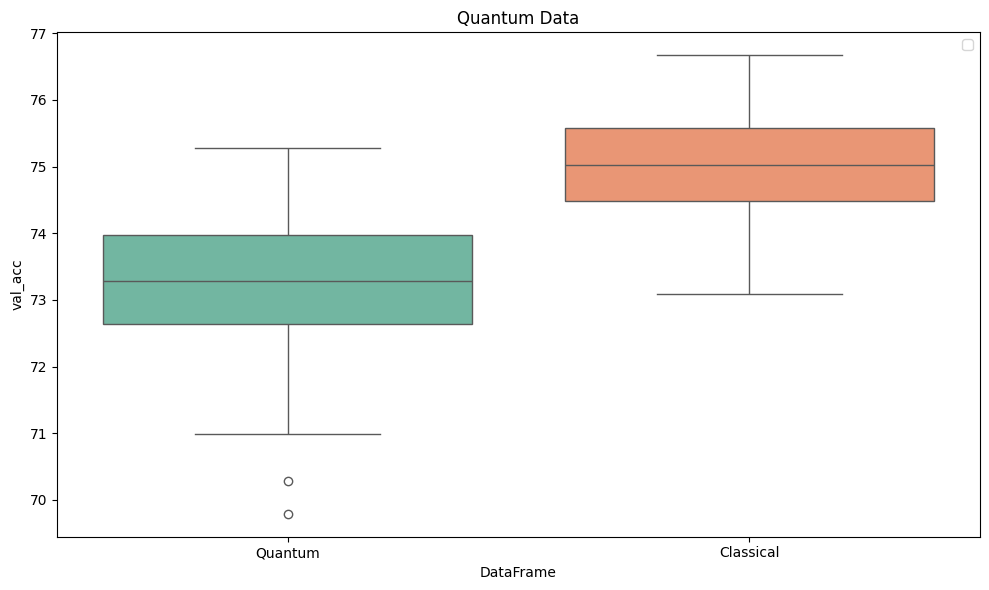

In [55]:
df_quantum_data = pd.read_csv('Hyperparameter_Tuning/mlp_size_is_3_num_transf_is_2_attn_sel_plus_attn_filter/QuantumData/27_channels_CarlosF/test2/results_grid_search.csv')

df_list = [df_quantum_data, df_classical_counterpart]
labels = ['Quantum', 'Classical']

plot_boxplots(df_list, labels = labels, value_column='test_auc', separation = None, title = 'Quantum Data')
plot_boxplots(df_list, labels = labels, value_column='val_acc', separation = None,title = 'Quantum Data')

# Quantum Data

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


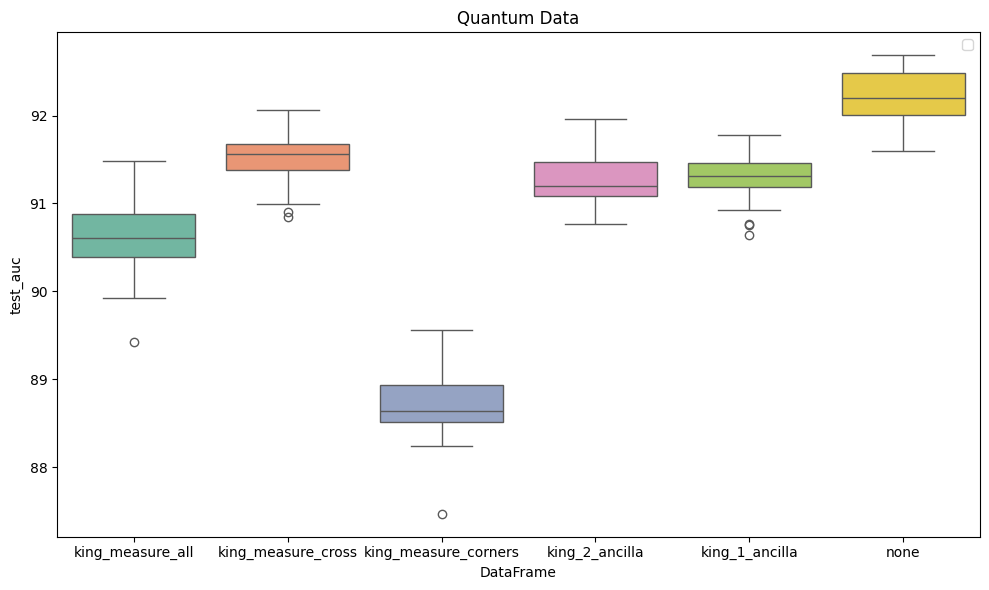

In [56]:
df_quantum_data_multitest = pd.read_csv('Hyperparameter_Tuning/mlp_size_is_3_num_transf_is_2_attn_sel_plus_attn_filter/QuantumData/multitest/results_grid_search.csv')

labels = df_quantum_data_multitest['quantum_data'].unique()

df_list = []

for label in labels:
    df_list.append(df_quantum_data_multitest[df_quantum_data_multitest['quantum_data']==label])

df_list.append(df_classical_counterpart)
labels = np.concatenate((labels, ['none']))

plot_boxplots(df_list, labels = labels, value_column='test_auc', separation=None, title = 'Quantum Data')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


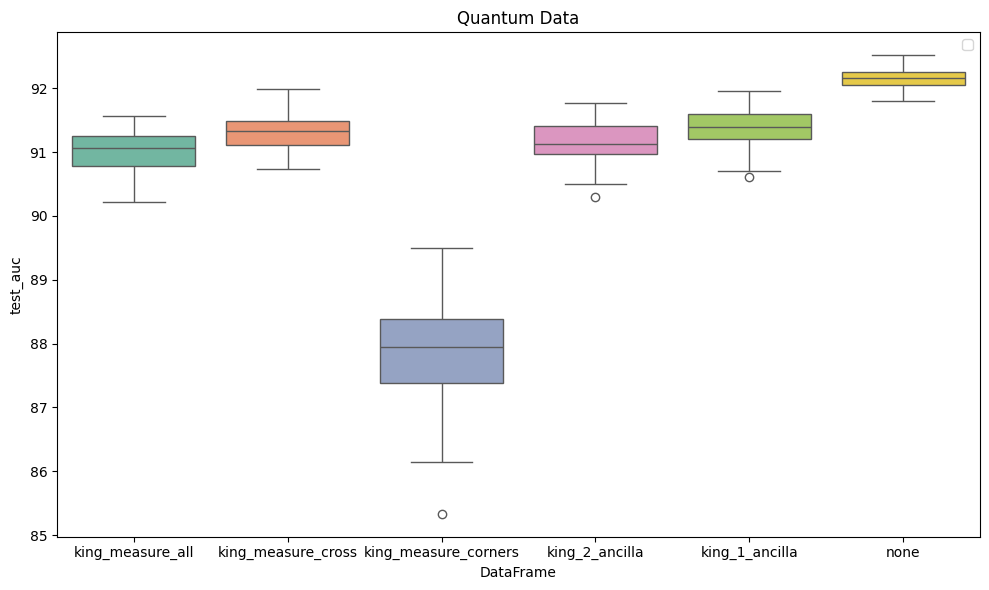

In [57]:
df_quantum_data_multitest2 = pd.read_csv('Hyperparameter_Tuning/mlp_size_is_3_num_transf_is_2_attn_sel_plus_attn_filter/QuantumData/multitest2/results_grid_search.csv')

labels = df_quantum_data_multitest2['quantum_data'].unique()

df_list = []

for label in labels:
    df_list.append(df_quantum_data_multitest2[df_quantum_data_multitest2['quantum_data']==label])

plot_boxplots(df_list, labels = labels, value_column='test_auc', separation=None, title = 'Quantum Data')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


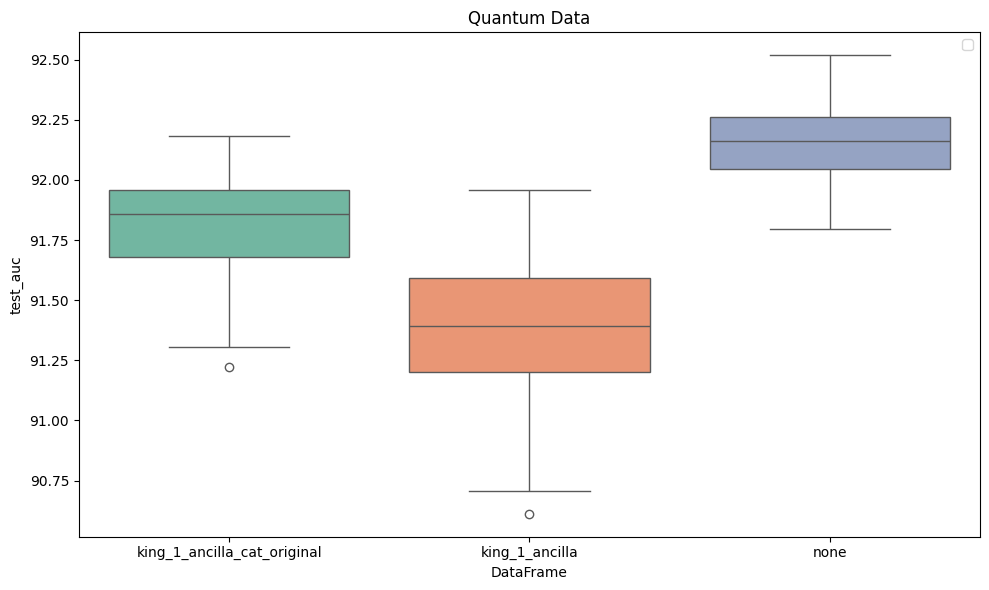

In [58]:
df_king_1_ancilla_cat_original = pd.read_csv('Hyperparameter_Tuning/mlp_size_is_3_num_transf_is_2_attn_sel_plus_attn_filter/QuantumData/cat_originals/results_grid_search.csv')
df_king_1_ancilla = df_quantum_data_multitest2[df_quantum_data_multitest2['quantum_data']=='king_1_ancilla']
df_none = df_quantum_data_multitest2[df_quantum_data_multitest2['quantum_data']=='none']

df_list = [df_king_1_ancilla_cat_original, df_king_1_ancilla, df_none]
labels = ['king_1_ancilla_cat_original', 'king_1_ancilla', 'none']

plot_boxplots(df_list, labels = labels, value_column='test_auc', separation=None, title = 'Quantum Data')